# Análise do perfil acadêmico/demográfico + histórico escolar dos discentes do curso de computação
**Objetivo:** Realizar análises descritivas, exploratórias e inferenciais, além de aplicar testes estatísticos para validar hipóteses sobre evasão e desempenho dos estudantes do curso de Ciência da Computação.

### Súmario
1. [Carga e preparação dos dados](#dados)
    - 1.1. [Análise Exploratória](#eda)
2. [Perfil dos alunos](#perfil)
    - 2.1. [Distribuição por sexo, raça, faixa etária, estado civil, nacionalidade.](#distribuiçao)
    - 2.2. [Proporção de evasão vs conclusão por perfil demográfico.](#proporçao)
    - 2.3. [Análise de correlação entre coeficiente de rendimento e evasão.](#analise)
3. [Trajetória acadêmica](#trajetoria)
    - 3.1. [Taxa média de aprovação/reprovação por disciplina.](#taxa)
    - 3.2. [Identificação de disciplinas gargalo (com maior índice de reprovação).](#identificao)
    - 3.3. [Evolução do desempenho do aluno por período (notas e faltas).](#evolucao)
    - 3.4. [Relação entre reprovações acumuladas e evasão.](#relacao)
4. [Comparação entre grupos](#comp)
    - 4.1. [Diferenças no coeficiente de rendimento por sexo, raça, tipo de ingresso.](#difeCoeficiente)
    - 4.2. [Diferença entre evasão por forma de ingresso (ENEM, transferência, e tipos de Cotas).](#difeEvasao)
5. [Testes estatísticos recomendados](#teste)
    - 5.1. [Comparações de médias](#media)
    - 5.2. [Associação entre variáveis catégoricas](#associacao)
    - 5.3. [Correlação](#corr)
    - 5.4. [Comparação de distribuições](#comp)
    - 5.5. [Modelagem estatística](#model)
6. [Conclusão Final](#conclusao)

## OBS: 
-   ### Separar os concluintes e evadidos por situação atual e realizar os testes novamente
-   ### Fazer as analises por PPC(estrutura)
-   ### Fazer um relátorio com os principais insights para cordenação do curso
-   ### Identificar rendimentos por grupo (ativos, inativos, concluintes)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import ks_2samp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from datetime import date


<a id='dados'></a>
## 1. Carga e preparação dos dados
Nesta seção, carregamos os três datasets necessários (`alunos_ativos`, `alunos_inativos`, `historico_escolar`)

### Vamos utilizar os datasets
- **alunos_ativos.csv:** Contém informações sobre os alunos que estão atualmente ativos na instituição.
- **alunos_inativos.csv:** Conjunto de dados contém informações sobre os alunos que não estão mais ativos na instituição.
- **historico_escolar.csv:** Conjunto de dados detalha o histórico acadêmico dos alunos, com informações sobre as disciplinas cursadas.

In [4]:
alunosAtivos = pd.read_csv('alunos_ativos.csv')
alunosInativos = pd.read_csv('alunos_inativos.csv') 
histEscolar = pd.read_csv('historico_escolar.csv')

<a id='eda'></a>
### 1.1 Análise Exploratória (EDA)
Realizamos uma análise exploratória para entender a distribuição dos dados, verificar valores nulos, duplicados e tratar inconsistências.

In [781]:
display(alunosAtivos.head())
display(alunosInativos.head())
display(histEscolar.head())

,Data Nascimento,Sexo,Raça,Estrangeiro,Nacionalidade,Naturalidade,UF Naturalidade,Período,Situação atual,Data ocorrência,Estrutura,Período ingresso,Tipo ingresso,IMI,Coeficiente,Tipo de demanda,rga_anonimo
0,2000-01-14,Masculino,"Pardo(a),Mulato(a)",Não,BRASILEIRO,ARAGARCAS,GO,20232,MATRICULADO NO PERÍODO,2023-11-16,20191,20181,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),56.7,5.49,L6 - Estudante preto pardo ou indígena de esco...,af05b362ddb9224c4589b23cbf119b60ce7e26300b6a3a...
1,1997-04-26,Masculino,"Pardo(a),Mulato(a)",Não,BRASILEIRO,SAO JOSE DO JACUIPE,BA,20232,AFASTAMENTO POR BLOQUEIO DE MATRICULA,2023-11-10,20191,20171,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),35.8,4.42,Ampla Concorrência,208844f5f871e3b92a344f0a6f7782b209872e5667ea13...
2,1999-09-04,Masculino,Negra,Não,BRASILEIRO,BARRA DO GARCAS,MT,20232,MATRICULADO NO PERÍODO,2023-12-01,20191,20171,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),50.1,5.93,Ampla Concorrência,157770a9bd112bd511d5fed47b295121e2be2e9d082f84...
3,1994-06-05,Masculino,"Pardo(a),Mulato(a)",Não,BRASILEIRO,SAO JOSÉ DO XINGU,MT,20232,AFASTAMENTO POR BLOQUEIO DE MATRICULA,2023-11-10,20191,20131,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),59.7,7.03,L4 - Estudante preto pardo ou indígena de esco...,71260f57df37913cf04b8a5f882737c071c9313b201158...
4,2004-05-24,Feminino,Branca,Não,BRASILEIRO,GOIANIA,GO,20232,AFASTAMENTO POR TRANCAMENTO DE MATRICULA,2023-11-30,20191,20221,INGRESSO POR PROCESSO SELETIVO ESPECÍFICO,50.8,4.78,Ampla Concorrência,d517234d3868dee3fc27d4ff1dee463e9d68b45d51ad22...


,Data Nascimento,Sexo,Raça,Estrangeiro,Nacionalidade,Naturalidade,UF Naturalidade,Período,Situação atual,Data ocorrência,Estrutura,Período ingresso,Tipo ingresso,IMI,Coeficiente,Tipo de demanda,rga_anonimo
0,1993-05-08,Masculino,Branca,Não,BRASILEIRO,ARAGARCAS,GO,20161,EXCLUSÃO POR DESLIGAMENTO - RESOLUÇÃO CONSEPE ...,2016-06-27,20091,20111,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),3.8,1.63,NaN,c31ebda923a730829336347280e50dcf10d35aa6f7de02...
1,1988-02-06,Feminino,"Pardo(a),Mulato(a)",Não,BRASILEIRO,PARAGOMINAS,PA,20221,EXCLUSAO POR CONCLUSAO (FORMADO),2023-02-10,20191,20141,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),68.6,6.95,L4 - Estudante preto pardo ou indígena de esco...,8a417431c97e7d34315177679327cc45414bbf093d4f07...
2,1991-11-26,Masculino,"Pardo(a),Mulato(a)",Não,BRASILEIRO,BARRA DO GARCAS - MT,MT,20131,EXCLUSAO POR CONCLUSAO (FORMADO),2013-09-19,20091,20091,INGRESSO POR TRANSFERENCIA DE REGIME,0.0,4.47,NaN,b251f5c111876bb185fdaf7f58535b4a6f3c8e924ab679...
3,1995-01-23,Masculino,Negra,Não,BRASILEIRO,BARRA DO GARCAS,MT,20192,EXCLUSÃO POR DESLIGAMENTO - RESOLUÇÃO CONSEPE ...,2019-11-12,20191,20161,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),0.0,0.00,L4 - Estudante preto pardo ou indígena de esco...,bf92b6a19e2b440d38ce69047587601b82314875b4d0f3...
4,1986-12-25,Masculino,Branca,Não,BRASILEIRO,MARABA,PA,20222,EXCLUSAO POR DESISTENCIA,2023-04-24,20191,20221,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),0.0,0.00,Ampla Concorrência,8beccafee2f40a099063c8631c8ecb1b760240d502e0e4...


,Ano,Código,Nome da Disciplina,CH,CR,TU,MF,FA,SF,SE,rga_anonimo,Disciplina,Grupo de Disciplinas,Tipo de Disciplina,Optativa
0,2010/1,72100022,FUNDAMENTOS DE MATEMÁTICA,64,4,CC,3.3,6,RM,1,e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...,Fundamentos de Matemática,Fundamentos de Matemática,Matemática,Não
1,2010/1,72100023,GEOMETRIA ANALÍTICA E VETORIAL,96,6,CC,5.0,0,AP,1,e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...,Geometria Analítica e Vetorial,Geometria,Matemática,Não
2,2010/1,70400377,Lógica Matemática e Elementos de Lógica Digital,96,6,CC,5.0,0,AP,1,e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...,Lógica Digital,Lógica Digital,Computação,Não
3,2010/1,70400375,Programação I,96,6,CC,4.6,4,RM,1,e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...,Programação I,Programação,Computação,Não
4,2010/1,72000016,Práticas de Leitura e Produção de Textos,96,6,CC,7.1,4,AP,1,e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...,Práticas de Leitura e Produção de Texto,Práticas de Leitura e Produção de Texto,Linguagens,Não


In [782]:
print(f"Linhas e colunas do dataset alunosAtivos: {alunosAtivos.shape}")
print(f"Linhas e colunas do dataset alunosInativos: {alunosInativos.shape}")
print(f"Linhas e colunas do dataset histEscolar: {histEscolar.shape}")

Linhas e colunas do dataset alunosAtivos: (220, 17)
Linhas e colunas do dataset alunosInativos: (498, 17)
Linhas e colunas do dataset histEscolar: (19528, 15)


In [783]:
print(f"Informações do dataset alunosAtivos:\n{alunosAtivos.info()}\n")
print(f"Informações do dataset alunosInativos:\n{alunosInativos.info()}\n")
print(f"Informações do dataset histEscolar:\n{histEscolar.info()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Data Nascimento   220 non-null    object 
 1   Sexo              220 non-null    object 
 2   Raça              220 non-null    object 
 3   Estrangeiro       220 non-null    object 
 4   Nacionalidade     220 non-null    object 
 5   Naturalidade      220 non-null    object 
 6   UF Naturalidade   220 non-null    object 
 7   Período           220 non-null    int64  
 8   Situação atual    220 non-null    object 
 9   Data ocorrência   220 non-null    object 
 10  Estrutura         220 non-null    int64  
 11  Período ingresso  220 non-null    int64  
 12  Tipo ingresso     220 non-null    object 
 13  IMI               220 non-null    float64
 14  Coeficiente       220 non-null    float64
 15  Tipo de demanda   219 non-null    object 
 16  rga_anonimo       220 non-null    object 
dt

In [784]:
#Consultando valores nulos
print(f"Valores nulos no dataset alunosAtivos:\n{alunosAtivos.isnull().sum()}\n")
print(f"Valores nulos no dataset alunosInativos:\n{alunosInativos.isnull().sum()}\n")
print(f"Valores nulos no dataset historicoEscolar:\n{histEscolar.isnull().sum()}\n")

Valores nulos no dataset alunosAtivos:
Data Nascimento     0
Sexo                0
Raça                0
Estrangeiro         0
Nacionalidade       0
Naturalidade        0
UF Naturalidade     0
Período             0
Situação atual      0
Data ocorrência     0
Estrutura           0
Período ingresso    0
Tipo ingresso       0
IMI                 0
Coeficiente         0
Tipo de demanda     1
rga_anonimo         0
dtype: int64

Valores nulos no dataset alunosInativos:
Data Nascimento       0
Sexo                  0
Raça                  0
Estrangeiro           0
Nacionalidade         0
Naturalidade         16
UF Naturalidade      38
Período               0
Situação atual        0
Data ocorrência      34
Estrutura             0
Período ingresso      0
Tipo ingresso         0
IMI                   0
Coeficiente           0
Tipo de demanda     191
rga_anonimo           0
dtype: int64

Valores nulos no dataset historicoEscolar:
Ano                     0
Código                  0
Nome da Discipl

In [785]:
# Consultando valores duplicados
print(f"Valores duplicados no dataset alunosAtivos: {alunosAtivos.duplicated().sum()}")
print(f"Valores duplicados no dataset alunosInativos: {alunosInativos.duplicated().sum()}")
print(f"Valores duplicados no dataset historicoEscolar: {histEscolar.duplicated().sum()}")

Valores duplicados no dataset alunosAtivos: 0
Valores duplicados no dataset alunosInativos: 0
Valores duplicados no dataset historicoEscolar: 0


<a id='perfil'></a>
## 2. Perfil dos Alunos

<a id='distibuiçao'></a>
### 2.1. Distribuição por sexo, raça, faixa etária, estado civil, nacionalidade.

In [5]:
# Unificar os datasets de alunos ativos e inativos
df_alunos = pd.concat([alunosAtivos, alunosInativos], ignore_index=True)
print(f"Linhas e colunas do dataset unificado de alunos: {df_alunos.shape}")

# Criar coluna 'Status' com base na situação atual
# Criar a coluna 'Status' com base na 'Situação atual'
conditions = [ 
    df_alunos['Situação atual'].isin(['MATRICULADO NO PERÍODO', 'AFASTAMENTO POR BLOQUEIO DE MATRICULA', 'AFASTAMENTO POR TRANCAMENTO DE MATRICULA']),
    df_alunos['Situação atual'] == 'EXCLUSAO POR CONCLUSAO (FORMADO)',
] #

# A escolha padrão será 'Evadido' para todos os outros casos do df_inativos
choices = ['Ativo', 'Concluinte'] # 

df_alunos['Status'] = np.select(conditions, choices, default='Evadido') 

# Verificar o resultado da nova coluna
print("--- Contagem por Status ---")
print(df_alunos['Status'].value_counts())
print("\nDataFrame unificado e preparado com sucesso!")

Linhas e colunas do dataset unificado de alunos: (718, 17)
--- Contagem por Status ---
Status
Evadido       387
Ativo         220
Concluinte    111
Name: count, dtype: int64

DataFrame unificado e preparado com sucesso!


In [16]:
df_alunos.columns

Index(['Data Nascimento', 'Sexo', 'Raça', 'Estrangeiro', 'Nacionalidade',
       'Naturalidade', 'UF Naturalidade', 'Período', 'Situação atual',
       'Data ocorrência', 'Estrutura', 'Período ingresso', 'Tipo ingresso',
       'IMI', 'Coeficiente', 'Tipo de demanda', 'rga_anonimo', 'status',
       'Status_Numerico', 'Status'],
      dtype='object')

In [6]:
# Comparar o Coeficiente médio dos dois grupos
media_evadidos = df_alunos[df_alunos['Status'] == 'Evadido']['Coeficiente'].mean()
media_concluintes = df_alunos[df_alunos['Status'] == 'Concluinte']['Coeficiente'].mean()

print(f"Coeficiente médio dos alunos evadidos: {media_evadidos:.2f}")
print(f"Coeficiente médio dos alunos concluintes: {media_concluintes:.2f}")

Coeficiente médio dos alunos evadidos: 2.21
Coeficiente médio dos alunos concluintes: 6.40


/tmp/ipykernel_3970/2895139035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_alunos, x='Status', y='Coeficiente', palette='coolwarm')


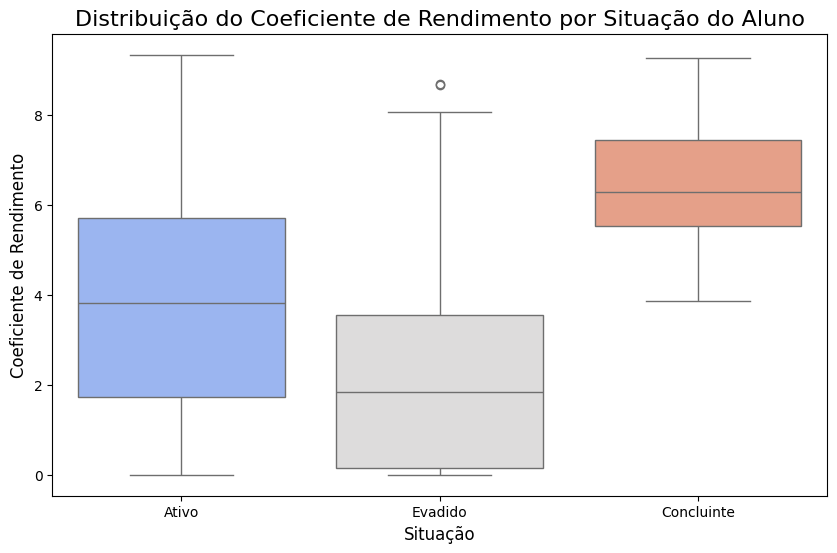

In [7]:
# box plot para visualizar a distribuição do Coeficiente por categoria
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_alunos, x='Status', y='Coeficiente', palette='coolwarm')
plt.title('Distribuição do Coeficiente de Rendimento por Situação do Aluno', fontsize=16)
plt.xlabel('Situação', fontsize=12)
plt.ylabel('Coeficiente de Rendimento', fontsize=12)
plt.show()

/tmp/ipykernel_3970/742970830.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_alunos, x='Sexo', palette='pastel')


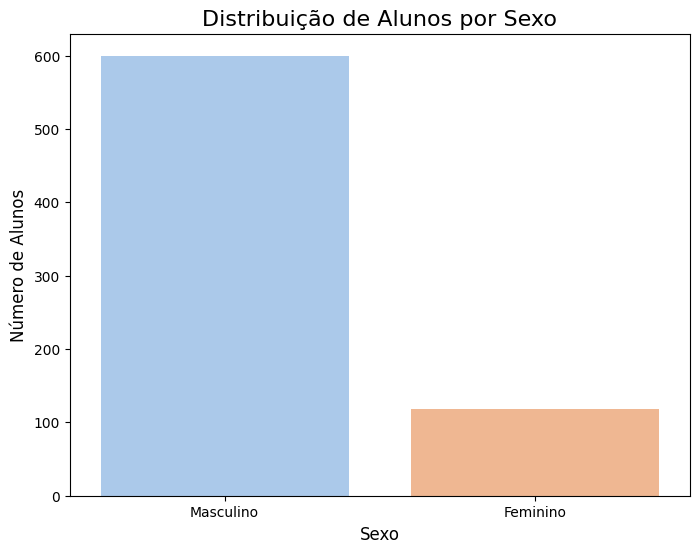

In [8]:
# Gráfico de Distribuição por Sexo
plt.figure(figsize=(8, 6))
sns.countplot(data=df_alunos, x='Sexo', palette='pastel')
plt.title('Distribuição de Alunos por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Número de Alunos', fontsize=12)
plt.show()

/tmp/ipykernel_3970/1790393338.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_alunos, y='Raça', order=df_alunos['Raça'].value_counts().index, palette='pastel')


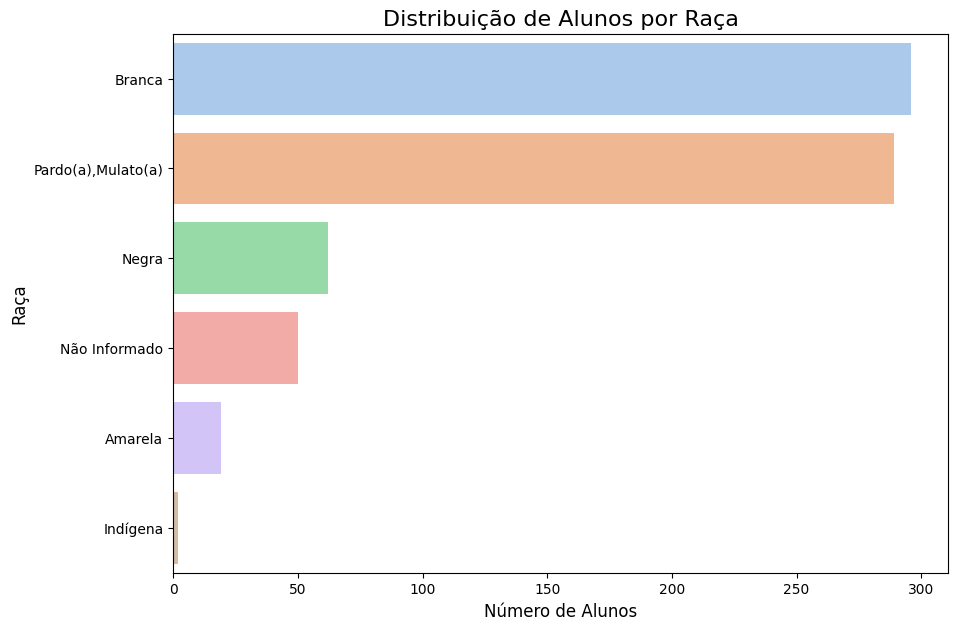

In [9]:
# Gráfico de Distribuição por Raça
plt.figure(figsize=(10, 7))
sns.countplot(data=df_alunos, y='Raça', order=df_alunos['Raça'].value_counts().index, palette='pastel')
plt.title('Distribuição de Alunos por Raça', fontsize=16)
plt.xlabel('Número de Alunos', fontsize=12)
plt.ylabel('Raça', fontsize=12)
plt.show()

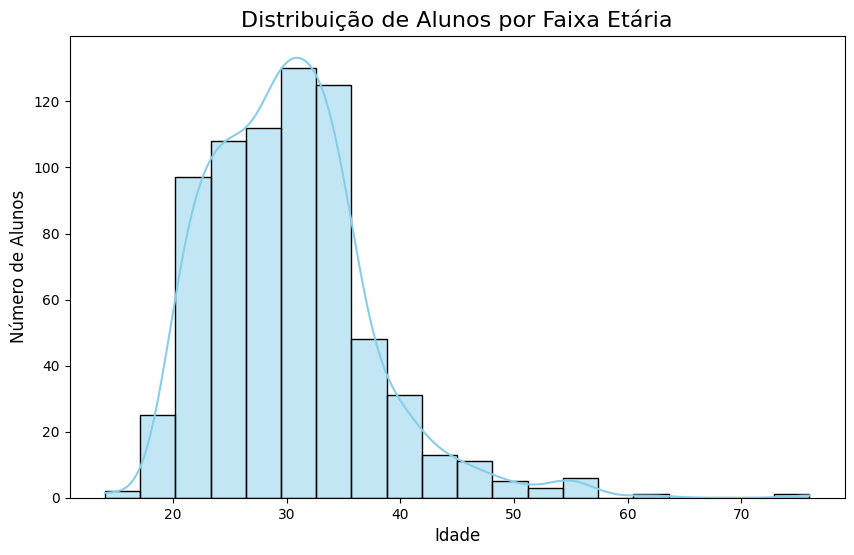

In [10]:
# Gráfico de Distribuição por Faixa Etária
# Primeiro calcula a idade de cada aluno
df_alunos['Data Nascimento'] = pd.to_datetime(df_alunos['Data Nascimento'])
hoje = pd.to_datetime(date.today())
df_alunos['Idade'] = (hoje - df_alunos['Data Nascimento']).dt.days // 365.25

plt.figure(figsize=(10, 6))
sns.histplot(data=df_alunos, x='Idade', bins=20, kde=True, color='skyblue')
plt.title('Distribuição de Alunos por Faixa Etária', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Número de Alunos', fontsize=12)
plt.show()

/tmp/ipykernel_3970/1376948265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_alunos, y='Naturalidade', order=df_alunos['Naturalidade'].value_counts().index[:10], palette='pastel')


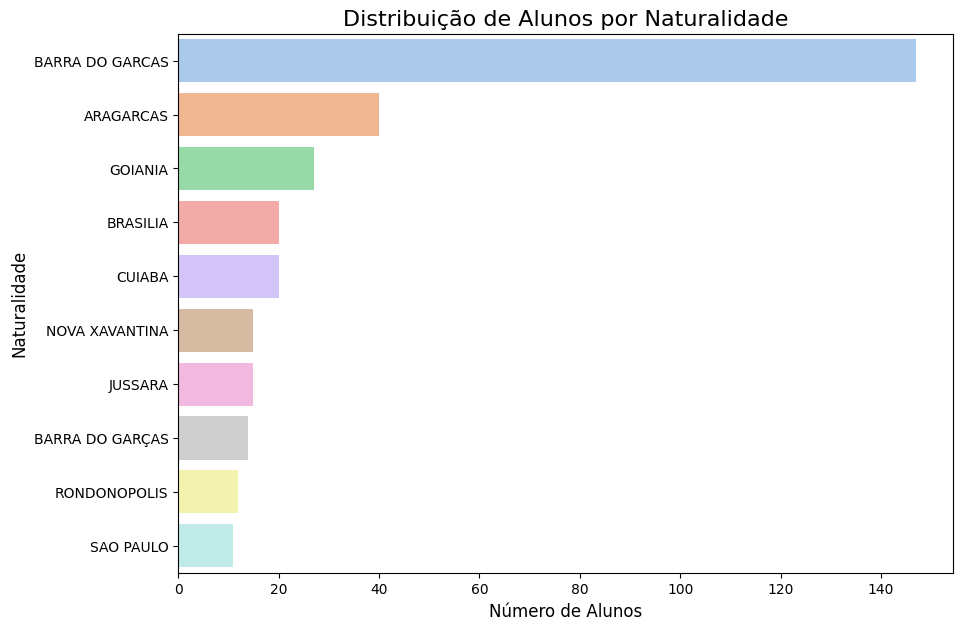

In [11]:
# Analisar a distribuição por top 10 naturalidades
plt.figure(figsize=(10, 7))
sns.countplot(data=df_alunos, y='Naturalidade', order=df_alunos['Naturalidade'].value_counts().index[:10], palette='pastel')
plt.title('Distribuição de Alunos por Naturalidade', fontsize=16)
plt.xlabel('Número de Alunos', fontsize=12)
plt.ylabel('Naturalidade', fontsize=12)
plt.show()

<a id='proporçao'></a>
### 2.2. Proporção de evasão vs conclusão por perfil demográfico.

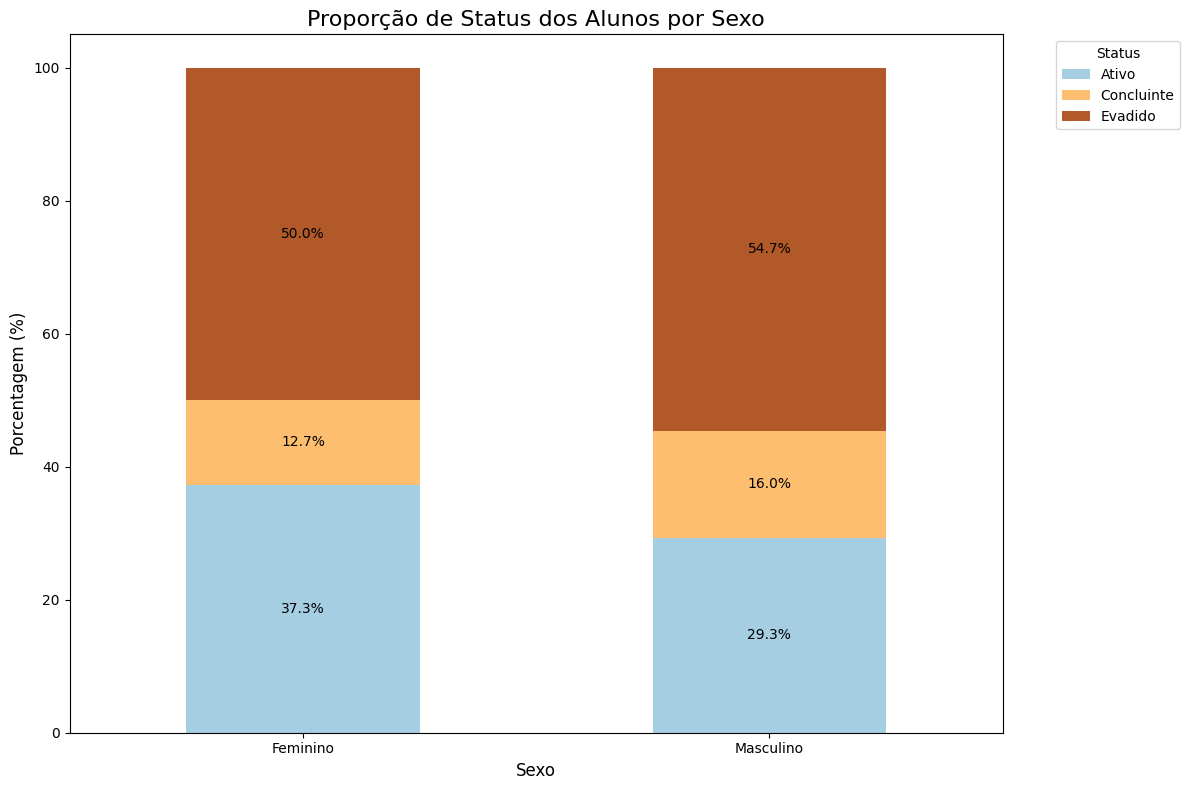

In [ ]:
# Tabela de contagem
sexo_evasao = (df_alunos
               .groupby(['Sexo', 'Status'])
               .size()
               .unstack(fill_value=0))

# Converter para proporção (%)
sexo_evasao = sexo_evasao.div(sexo_evasao.sum(axis=1), axis=0) * 100

ax = sexo_evasao.plot(kind='bar',
                      stacked=True,
                      figsize=(12, 8),
                      colormap='Paired')

plt.title('Proporção de Status dos Alunos por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')


# Loop para adicionar os rótulos de dados em cada segmento
for container in ax.containers:
    # O 'fmt' formata o número para ter uma casa decimal e o símbolo de '%'
    ax.bar_label(container, label_type='center', fmt='%.1f%%', fontsize=10, color='black')

plt.tight_layout() 
plt.show()

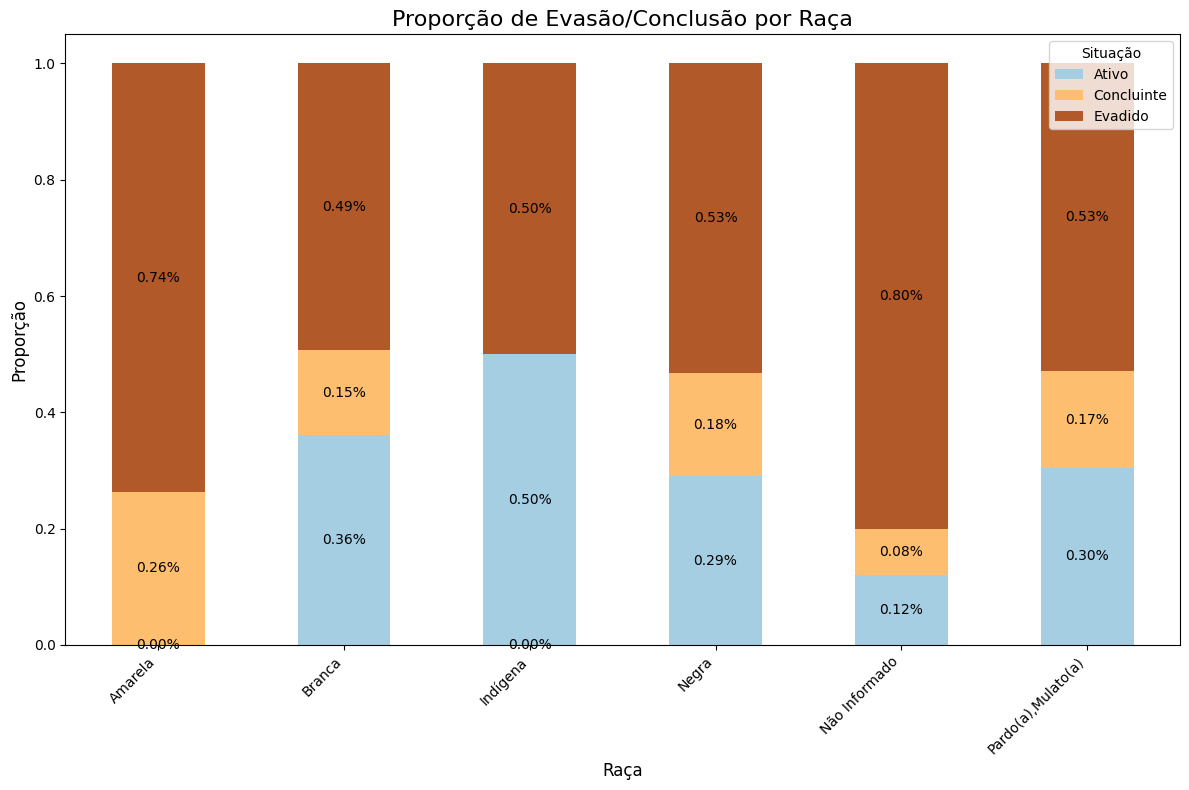

In [15]:
# Gráfico da proporção de Evasão vs Conclusão por Raça
raca_evasao = df_alunos.groupby('Raça')['Status'].value_counts(normalize=True).unstack().fillna(0)
raca_evasao = raca_evasao[['Ativo', 'Concluinte', 'Evadido']]

ax =raca_evasao.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Paired')
plt.title('Proporção de Evasão/Conclusão por Raça', fontsize=16)
plt.xlabel('Raça', fontsize=12)
plt.ylabel('Proporção', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Situação')

# Loop para adicionar os rótulos de dados em cada segmento
for container in ax.containers:
    # O 'fmt' formata o número para ter uma casa decimal e o símbolo de '%'
    ax.bar_label(container, label_type='center', fmt='%.2f%%', fontsize=10, color='black')

plt.tight_layout()
plt.show()

--- Contagem das 5 cidades mais frequentes após a limpeza completa: ---
Naturalidade_Limpia
BARRA DO GARCAS    170
ARAGARCAS           45
GOIANIA             28
BRASILIA            20
CUIABA              20
Name: count, dtype: int64


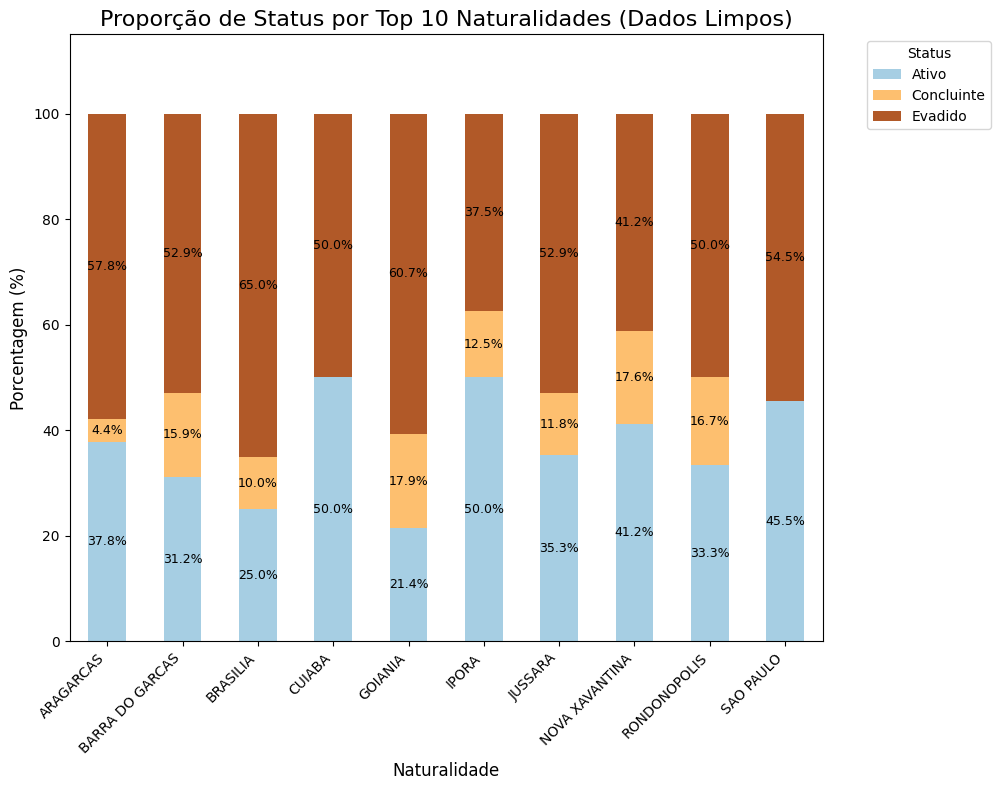

In [22]:
df_alunos['Naturalidade_Limpia'] = (df_alunos['Naturalidade']
                                    .str.strip()  # Remove espaços extras no início/fim
                                    .str.upper()  # Converte para maiúsculas
                                    .str.replace('Ç', 'C')  # A correção chave!
                                    .str.replace(' - MT', '')
                                    .str.replace('-GO', ''))

print("--- Contagem das 5 cidades mais frequentes após a limpeza completa: ---")
print(df_alunos['Naturalidade_Limpia'].value_counts().head())


# 2. Gerar o gráfico usando a coluna limpa
top_10_naturalidades = df_alunos['Naturalidade_Limpia'].value_counts().nlargest(10).index
df_top10 = df_alunos[df_alunos['Naturalidade_Limpia'].isin(top_10_naturalidades)]

proporcoes_naturalidade = (df_top10.groupby('Naturalidade_Limpia')['Status']
                           .value_counts(normalize=True)
                           .unstack(fill_value=0) * 100)
proporcoes_naturalidade = proporcoes_naturalidade[['Ativo', 'Concluinte', 'Evadido']]

ax = proporcoes_naturalidade.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Paired')
plt.title('Proporção de Status por Top 10 Naturalidades (Dados Limpos)', fontsize=16)
plt.xlabel('Naturalidade', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 115)

for container in ax.containers:
    labels = [f'{v:.1f}%' if v > 0 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9, color='black')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

<a id='analise'></a>
### 2.3. Análise de correlação entre coeficiente de rendimento e evasão.

In [23]:
# Converte a coluna 'Coeficiente' para tipo numérico
df_alunos['Coeficiente'] = pd.to_numeric(df_alunos['Coeficiente'], errors='coerce')



# Filtra o DataFrame para incluir apenas os alunos Concluintes e Evadidos
df_finalizado = df_alunos[df_alunos['Status'].isin(['Concluinte', 'Evadido'])].copy()


# Compara o Coeficiente médio dos dois grupos
media_evadidos = df_finalizado[df_finalizado['Status'] == 'Evadido']['Coeficiente'].mean()
media_concluintes = df_finalizado[df_finalizado['Status'] == 'Concluinte']['Coeficiente'].mean()


print(f"Coeficiente médio dos alunos evadidos: {media_evadidos:.2f}")
print(f"Coeficiente médio dos alunos concluintes: {media_concluintes:.2f}")

Coeficiente médio dos alunos evadidos: 2.21
Coeficiente médio dos alunos concluintes: 6.40


/tmp/ipykernel_3970/1876841767.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_alunos, x='Status', y='Coeficiente', palette='pastel')


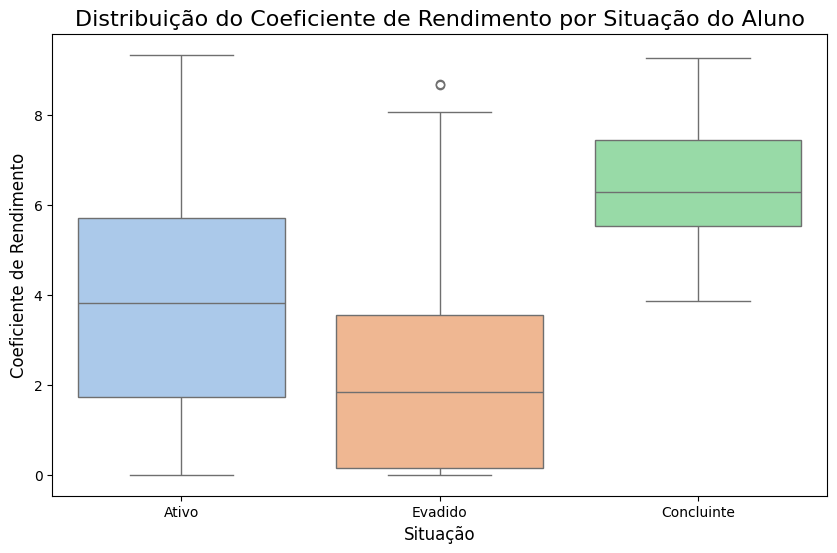

In [24]:
# Criar um box plot para visualizar a distribuição do Coeficiente por situação do aluno
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_alunos, x='Status', y='Coeficiente', palette='pastel')
plt.title('Distribuição do Coeficiente de Rendimento por Situação do Aluno', fontsize=16)
plt.xlabel('Situação', fontsize=12)
plt.ylabel('Coeficiente de Rendimento', fontsize=12)
plt.show()

<a id='trajetoria'></a>
## 3. Trajetória Acadêmica

<a id='taxa'></a>
### 3.1. Taxa média de aprovação/reprovação por disciplina.

In [25]:
# Exibir as primeiras linhas 
print(histEscolar.head())

      Ano    Código                               Nome da Disciplina  CH  CR  \
0  2010/1  72100022                        FUNDAMENTOS DE MATEMÁTICA  64   4   
1  2010/1  72100023                   GEOMETRIA ANALÍTICA E VETORIAL  96   6   
2  2010/1  70400377  Lógica Matemática e Elementos de Lógica Digital  96   6   
3  2010/1  70400375                                    Programação I  96   6   
4  2010/1  72000016         Práticas de Leitura e Produção de Textos  96   6   

   TU   MF  FA  SF  SE                                        rga_anonimo  \
0  CC  3.3   6  RM   1  e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...   
1  CC  5.0   0  AP   1  e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...   
2  CC  5.0   0  AP   1  e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...   
3  CC  4.6   4  RM   1  e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...   
4  CC  7.1   4  AP   1  e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...   

                                Disciplina  \
0         

In [29]:
# Analisar PPC para identificar matérias que impactam na evasão
# Fazer a junção dos dados de alunos com o histórico escolar
df_historico = histEscolar.merge(df_alunos[['rga_anonimo','Status', 'Coeficiente', 'Estrutura']], on='rga_anonimo', how='left')
print(f"Linhas e colunas do dataset histórico com status: {df_historico.shape}")
display(df_historico.head())

Linhas e colunas do dataset histórico com status: (19528, 18)


,Ano,Código,Nome da Disciplina,CH,CR,TU,MF,FA,SF,SE,rga_anonimo,Disciplina,Grupo de Disciplinas,Tipo de Disciplina,Optativa,Status,Coeficiente,Estrutura
0,2010/1,72100022,FUNDAMENTOS DE MATEMÁTICA,64,4,CC,3.3,6,RM,1,e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...,Fundamentos de Matemática,Fundamentos de Matemática,Matemática,Não,Evadido,3.29,20091
1,2010/1,72100023,GEOMETRIA ANALÍTICA E VETORIAL,96,6,CC,5.0,0,AP,1,e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...,Geometria Analítica e Vetorial,Geometria,Matemática,Não,Evadido,3.29,20091
2,2010/1,70400377,Lógica Matemática e Elementos de Lógica Digital,96,6,CC,5.0,0,AP,1,e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...,Lógica Digital,Lógica Digital,Computação,Não,Evadido,3.29,20091
3,2010/1,70400375,Programação I,96,6,CC,4.6,4,RM,1,e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...,Programação I,Programação,Computação,Não,Evadido,3.29,20091
4,2010/1,72000016,Práticas de Leitura e Produção de Textos,96,6,CC,7.1,4,AP,1,e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...,Práticas de Leitura e Produção de Texto,Práticas de Leitura e Produção de Texto,Linguagens,Não,Evadido,3.29,20091


In [33]:
# Definir os códigos que consideramos como reprovação
codigos_reprovacao = ['RM', 'RF']

# Filtrar o DataFrame para manter apenas as linhas de reprovação
df_reprovacoes = df_historico[df_historico['SF'].isin(codigos_reprovacao)]

# Agrupar por Estrutura e Nome da Disciplina e contar o número de reprovações
disciplinas_gargalo = (df_reprovacoes.groupby(['Estrutura', 'Nome da Disciplina'])
                       .size()  # 'size()' conta o número de ocorrências em cada grupo
                       .reset_index(name='Num_Reprovacoes'))

# Ordenar os resultados para ver as disciplinas com mais reprovações no topo de cada estrutura
disciplinas_gargalo = disciplinas_gargalo.sort_values(by=['Estrutura', 'Num_Reprovacoes'], ascending=[True, False])

# Exibir as 10 disciplinas com mais reprovações para cada estrutura
print("--- Top 10 Disciplinas com Mais Reprovações por Estrutura ---")
top_disciplinas = disciplinas_gargalo.groupby('Estrutura').head(10)

# Usando style para melhor visualização (opcional, mas recomendado no Jupyter)
try:
    display(top_disciplinas.style.background_gradient(cmap='Reds', subset=['Num_Reprovacoes']))
except:
    print(top_disciplinas)

--- Top 10 Disciplinas com Mais Reprovações por Estrutura ---


,Estrutura,Nome da Disciplina,Num_Reprovacoes
35,20091,Programação I,124
1,20091,Banco de Dados,119
19,20091,FUNDAMENTOS DE MATEMÁTICA,119
21,20091,GEOMETRIA ANALÍTICA E VETORIAL,108
29,20091,Lógica Matemática e Elementos de Lógica Digital,107
32,20091,Matemática Discreta,85
14,20091,ESTATISTICA GERAL,69
6,20091,CÁLCULO I,67
31,20091,MECÂNICA,66
0,20091,Arquitetura e Organização de Computadores,64


### 3.2 - Identificação de disciplinas gargalo (com maior índice de reprovação).

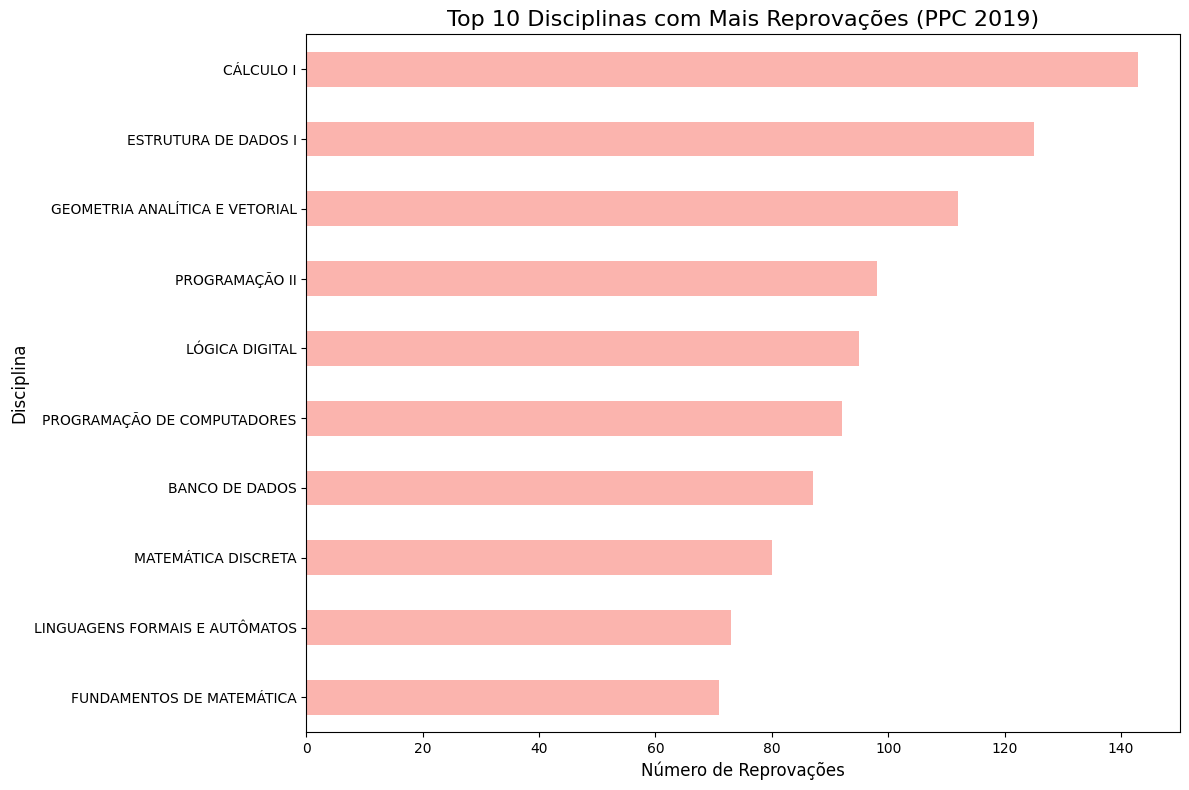

In [ ]:
disciplinas_gargalo = (df_reprovacoes.groupby(['Estrutura', 'Disciplina_Limpia'])
                       .size()
                       .reset_index(name='Num_Reprovacoes'))

disciplinas_gargalo_sorted = disciplinas_gargalo.sort_values(
    by=['Estrutura', 'Num_Reprovacoes'], ascending=[True, False]
)

# FILTRANDO APENAS PARA A ESTRUTURA 20191
top_10_ppc_2019 = (disciplinas_gargalo_sorted[disciplinas_gargalo_sorted['Estrutura'] == 20191]
                   .head(10))

# --- Geração do Gráfico de Barras ---

# Preparar dados para o gráfico
# Invertemos a ordem para que a matéria com mais reprovações apareça no topo
df_plot = top_10_ppc_2019.set_index('Disciplina_Limpia').sort_values('Num_Reprovacoes', ascending=True)

# Criar o gráfico
fig, ax = plt.subplots(figsize=(12, 8))
df_plot['Num_Reprovacoes'].plot(kind='barh', ax=ax, colormap='Pastel1')
# Adicionar Títulos e Rótulos
ax.set_title('Top 10 Disciplinas com Mais Reprovações (PPC 2019)', fontsize=16)
ax.set_xlabel('Número de Reprovações', fontsize=12)
ax.set_ylabel('Disciplina', fontsize=12)

# Ajustar o layout para evitar que os rótulos sejam cortados
plt.tight_layout()
plt.show()

### 3.3 - Evolução do desempenho do aluno por período (notas e faltas).

In [48]:
# Converter as colunas para o tipo numérico (caso não estejam)
df_historico['MF'] = pd.to_numeric(df_historico['MF'], errors='coerce')
df_historico['FA'] = pd.to_numeric(df_historico['FA'], errors='coerce')
df_historico['SE'] = pd.to_numeric(df_historico['SE'], errors='coerce')


# Calcular o desempenho médio (nota e faltas) por semestre e categoria
df_desempenho_semestre = df_historico.groupby(['Status', 'SE']).agg(
    media_nota=('MF', 'mean'),
    media_faltas=('FA', 'mean')
).reset_index()



# Exibir os resultados para conferência
print(df_desempenho_semestre.head(10))

       Status  SE  media_nota  media_faltas
0       Ativo   0    4.771747     10.886476
1       Ativo   1    4.569902      7.626316
2       Ativo   2    3.858977      6.806818
3       Ativo   3    4.868967      5.275335
4       Ativo   4    3.517121      5.360451
5       Ativo   5    6.342361      2.236066
6       Ativo   6    4.890391      4.671010
7       Ativo   7    5.462011      4.574074
8       Ativo   8    0.000000      0.000000
9  Concluinte   0    6.048711      7.997537


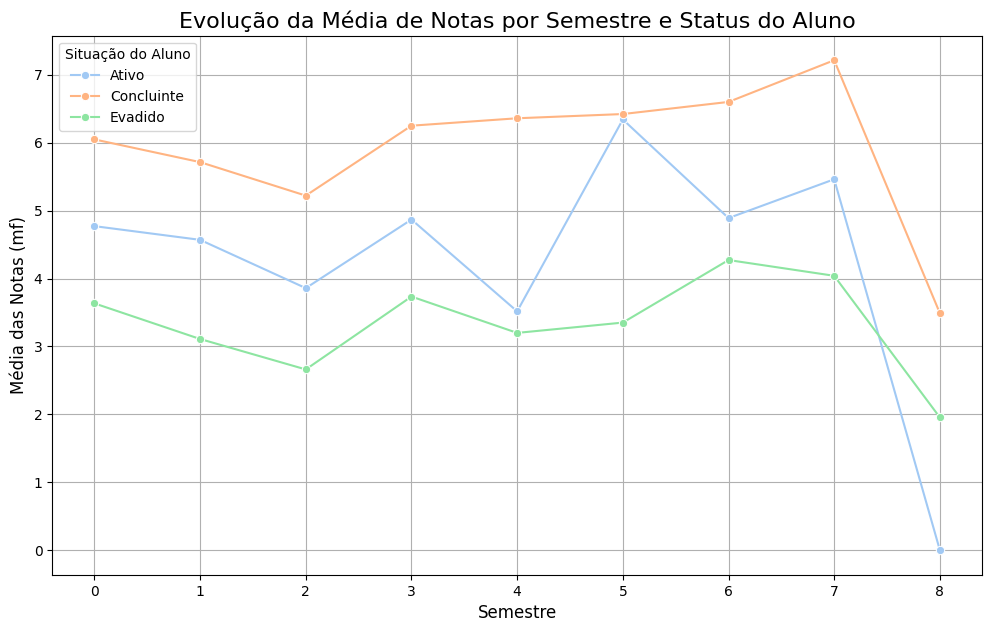

In [50]:
# Gráfico de evolução da média de notas
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_desempenho_semestre, x='SE', y='media_nota', hue='Status', marker='o', palette='pastel')
plt.title('Evolução da Média de Notas por Semestre e Status do Aluno', fontsize=16)
plt.xlabel('Semestre', fontsize=12)
plt.ylabel('Média das Notas (mf)', fontsize=12)
plt.xticks(df_desempenho_semestre['SE'].unique())
plt.grid(True)
plt.legend(title='Situação do Aluno')
plt.show()

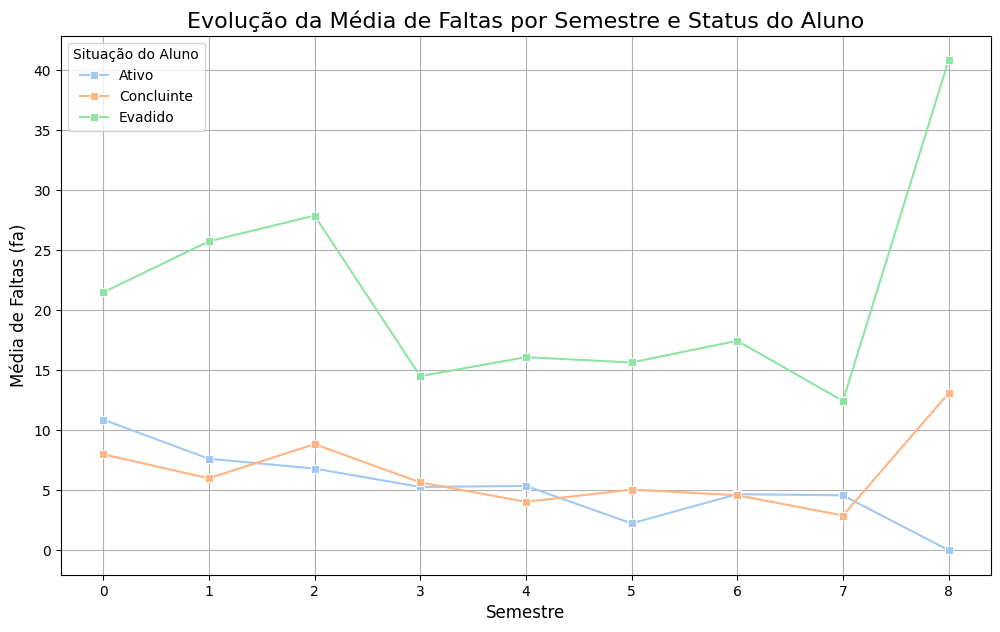

In [51]:
# Gráfico de Evolução da Média de Faltas por Semestre
# Gráfico de evolução da média de faltas
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_desempenho_semestre, x='SE', y='media_faltas', hue='Status', marker='s', palette='pastel')
plt.title('Evolução da Média de Faltas por Semestre e Status do Aluno', fontsize=16)
plt.xlabel('Semestre', fontsize=12)
plt.ylabel('Média de Faltas (fa)', fontsize=12)
plt.xticks(df_desempenho_semestre['SE'].unique())
plt.grid(True)
plt.legend(title='Situação do Aluno')
plt.show()


### 3.4 - Relação entre reprovações acumuladas e evasão.

In [55]:
df_reprovacoes = df_historico[df_historico['SF'].isin(codigos_reprovacao)]

# Agrupamos pelo RGA e contamos quantas vezes cada aluno foi reprovado
reprovacoes_por_aluno = df_reprovacoes.groupby('rga_anonimo').size().reset_index(name='total_reprovacoes')

# PASSO 2: Juntar essa contagem com o DataFrame de alunos
# Usamos pd.merge para adicionar a coluna 'total_reprovacoes' ao df_alunos
df_alunos_reprovacoes = pd.merge(df_alunos, reprovacoes_por_aluno, on='rga_anonimo', how='left')

# Alunos que nunca reprovaram ficarão com NaN (Nulo). Preenchemos com 0.
df_alunos_reprovacoes['total_reprovacoes'] = df_alunos_reprovacoes['total_reprovacoes'].fillna(0)

# PASSO 3: Calcular as médias (agora usando o DataFrame correto)
# Filtramos o novo DataFrame e calculamos a média da coluna que acabamos de criar
media_reprovacoes_evadidos = df_alunos_reprovacoes[df_alunos_reprovacoes['Status'] == 'Evadido']['total_reprovacoes'].mean()
media_reprovacoes_concluintes = df_alunos_reprovacoes[df_alunos_reprovacoes['Status'] == 'Concluinte']['total_reprovacoes'].mean()

print(f"Média de reprovações de alunos evadidos: {media_reprovacoes_evadidos:.2f}")
print(f"Média de reprovações de alunos concluintes: {media_reprovacoes_concluintes:.2f}")

Média de reprovações de alunos evadidos: 4.95
Média de reprovações de alunos concluintes: 6.13


/tmp/ipykernel_3970/560313451.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_alunos_reprovacoes, x='Status', y='total_reprovacoes', palette='pastel')


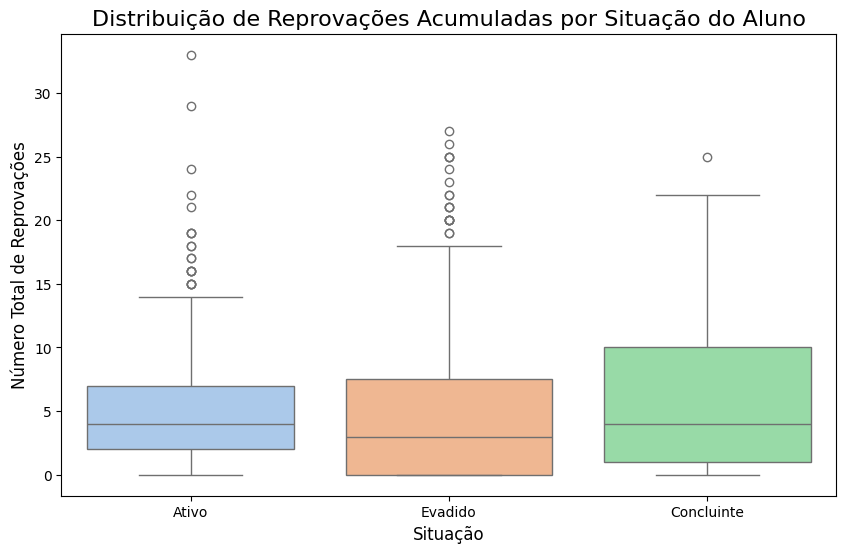

In [56]:
# Criar um box plot para visualizar a distribuição
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_alunos_reprovacoes, x='Status', y='total_reprovacoes', palette='pastel')
plt.title('Distribuição de Reprovações Acumuladas por Situação do Aluno', fontsize=16)
plt.xlabel('Situação', fontsize=12)
plt.ylabel('Número Total de Reprovações', fontsize=12)
plt.show()

## 4. Comparação entre grupos

### 4.1 - Diferenças no coeficiente de rendimento por sexo, raça, tipo de ingresso.

/tmp/ipykernel_3970/1872253114.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_alunos, x='Sexo', y='Coeficiente', palette='pastel')


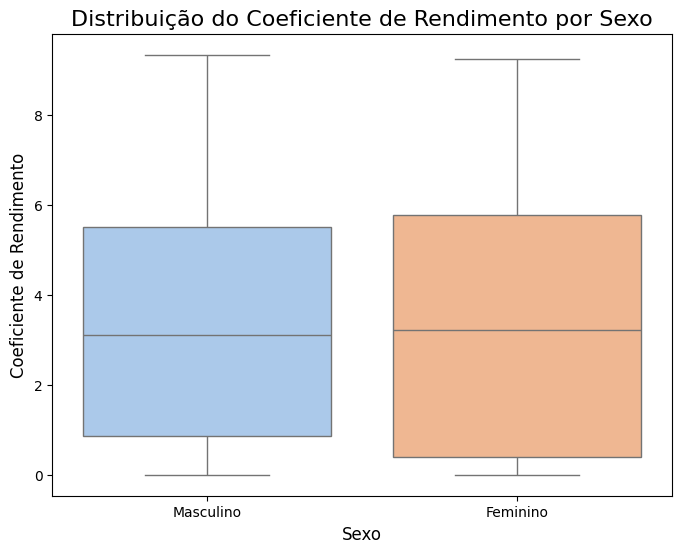

Coeficiente Médio por Sexo:
Sexo
Feminino     3.280932
Masculino    3.331867
Name: Coeficiente, dtype: float64


In [58]:
# Análise de CR por Sexo
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_alunos, x='Sexo', y='Coeficiente', palette='pastel')
plt.title('Distribuição do Coeficiente de Rendimento por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Coeficiente de Rendimento', fontsize=12)
plt.show()

media_cr_sexo = df_alunos.groupby('Sexo')['Coeficiente'].mean()
print("Coeficiente Médio por Sexo:")
print(media_cr_sexo)

/tmp/ipykernel_3970/2873245113.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_alunos, x='Raça', y='Coeficiente', palette='pastel')


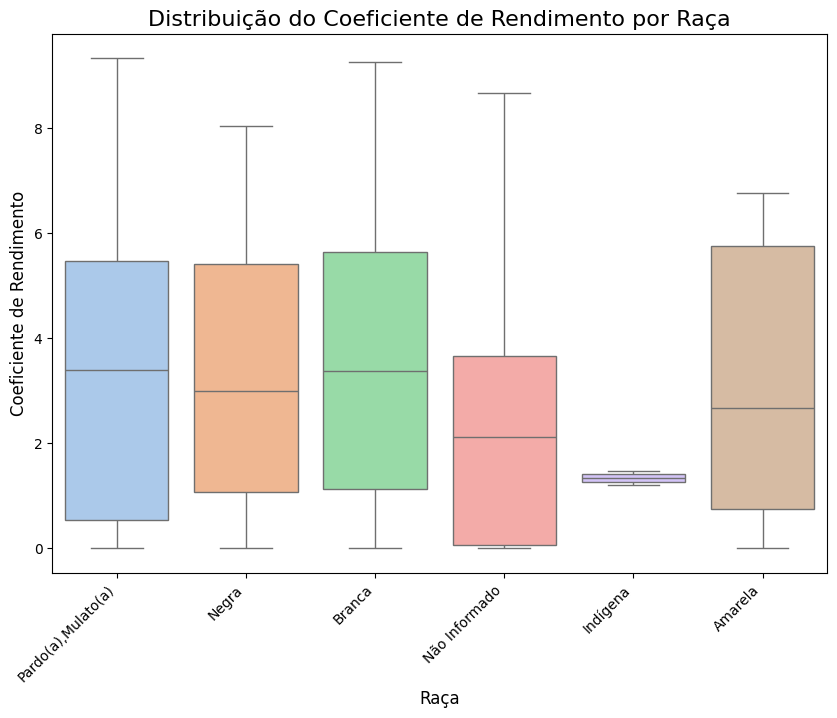

Coeficiente Médio por Raça:
Raça
Amarela               3.106842
Branca                3.489493
Indígena              1.340000
Negra                 3.249194
Não Informado         2.606200
Pardo(a),Mulato(a)    3.321488
Name: Coeficiente, dtype: float64


In [60]:
# Análise de CR por Raça
plt.figure(figsize=(10, 7))
sns.boxplot(data=df_alunos, x='Raça', y='Coeficiente', palette='pastel')
plt.title('Distribuição do Coeficiente de Rendimento por Raça', fontsize=16)
plt.xlabel('Raça', fontsize=12)
plt.ylabel('Coeficiente de Rendimento', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

media_cr_raca = df_alunos.groupby('Raça')['Coeficiente'].mean()
print("Coeficiente Médio por Raça:")
print(media_cr_raca)

/tmp/ipykernel_3970/3189858057.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_alunos, x='Tipo ingresso', y='Coeficiente', palette='pastel')


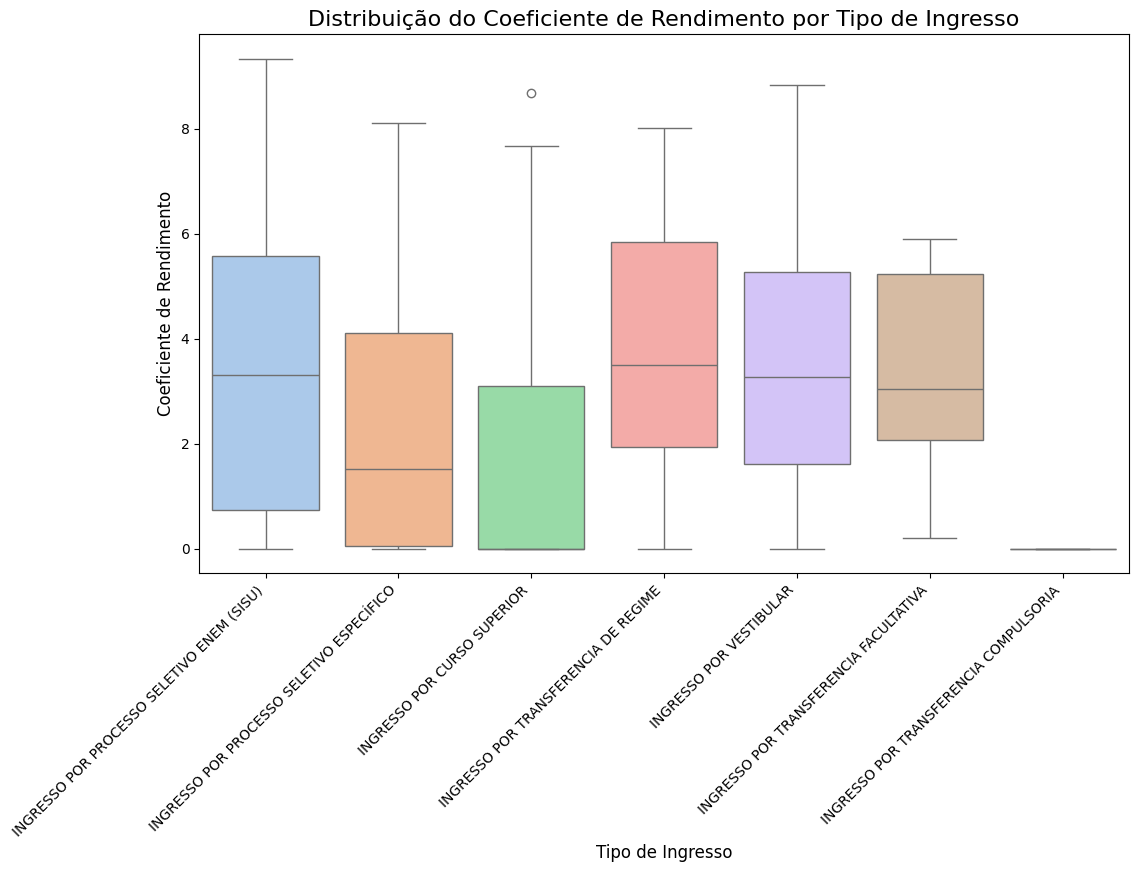

Coeficiente Médio por Tipo de Ingresso:
Tipo ingresso
INGRESSO POR CURSO SUPERIOR                   2.185455
INGRESSO POR PROCESSO SELETIVO ENEM (SISU)    3.380584
INGRESSO POR PROCESSO SELETIVO ESPECÍFICO     2.451892
INGRESSO POR TRANSFERENCIA COMPULSORIA        0.000000
INGRESSO POR TRANSFERENCIA DE REGIME          3.724545
INGRESSO POR TRANSFERENCIA FACULTATIVA        3.315000
INGRESSO POR VESTIBULAR                       3.358542
Name: Coeficiente, dtype: float64


In [63]:
# Análise de CR por Tipo de Ingresso
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_alunos, x='Tipo ingresso', y='Coeficiente', palette='pastel')
plt.title('Distribuição do Coeficiente de Rendimento por Tipo de Ingresso', fontsize=16)
plt.xlabel('Tipo de Ingresso', fontsize=12)
plt.ylabel('Coeficiente de Rendimento', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

media_cr_ingresso = df_alunos.groupby('Tipo ingresso')['Coeficiente'].mean()
print("Coeficiente Médio por Tipo de Ingresso:")
print(media_cr_ingresso)

### 4.2 - Diferença entre evasão por forma de ingresso (ENEM, transferência, e tipos de Cotas).


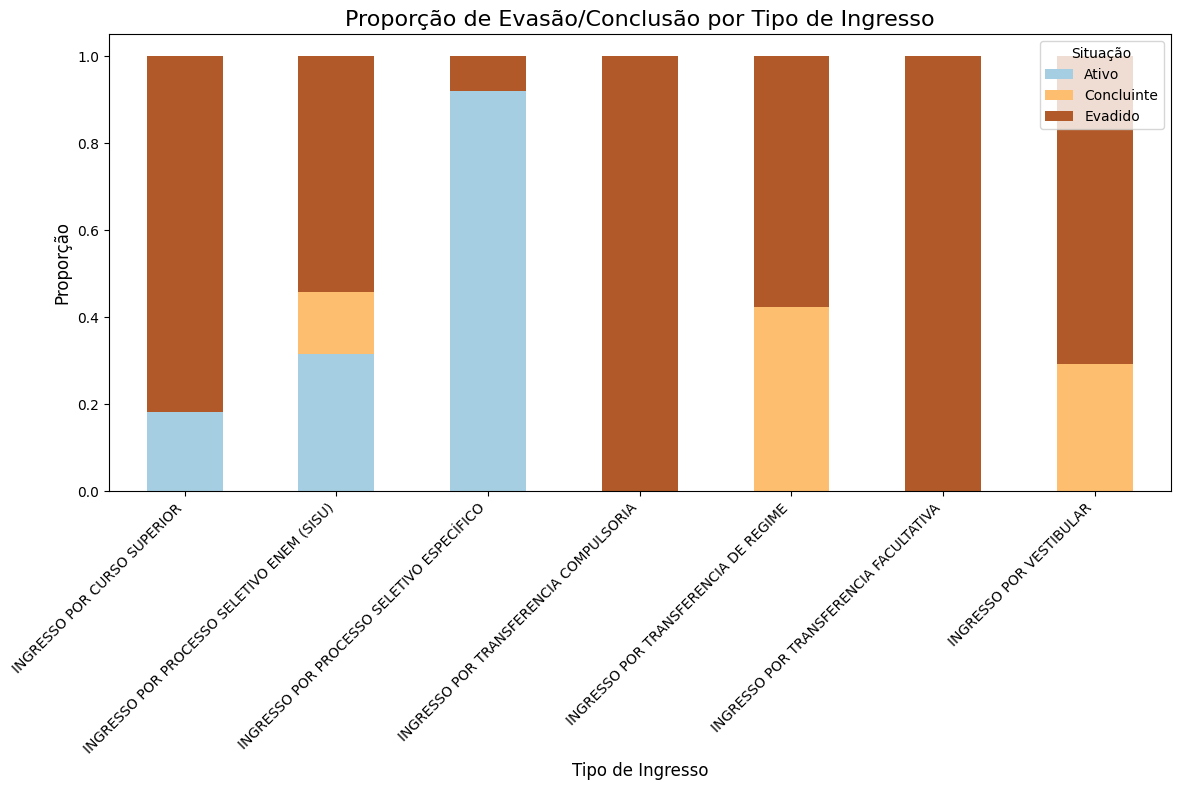

In [64]:
# Calcular a proporção de evasão por tipo de ingresso
df_ingresso_evasao = df_alunos.groupby('Tipo ingresso')['Status'].value_counts(normalize=True).unstack().fillna(0)


# Reordenar as colunas para que o gráfico seja mais claro
if 'Ativo' in df_ingresso_evasao.columns:
    colunas_ordenadas = ['Ativo', 'Concluinte', 'Evadido']
    df_ingresso_evasao = df_ingresso_evasao.reindex(columns=colunas_ordenadas, fill_value=0)



# Crie um gráfico de barras empilhadas
df_ingresso_evasao.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Paired')
plt.title('Proporção de Evasão/Conclusão por Tipo de Ingresso', fontsize=16)
plt.xlabel('Tipo de Ingresso', fontsize=12)
plt.ylabel('Proporção', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Situação')
plt.tight_layout()
plt.show()

<a id='teste'></a>
## 5. Testes estatísticos recomendados

### Merge
Antes de realizar os testes precisamos agrupar os alunos ativos e inativos para diferenciar quem é evadido e quem é concluinte.

<a id='media'></a>
### 5.1. Comparações de média

- **ANOVA (ou Kruskal–Wallis, se não normal)** → comparar rendimento entre diferentes **tipos de ingresso** ou **estruturas curriculares.**

--- Teste de Kruskal-Wallis: Coeficiente por Tipo de Ingresso ---
Estatística do teste: 11.2680
P-valor: 0.0804
Resultado: Não há evidência de uma diferença significativa no Coeficiente entre os diferentes Tipos de Ingresso.


/tmp/ipykernel_3970/3964668330.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_alunos, x='Tipo ingresso', y='Coeficiente', palette='viridis')


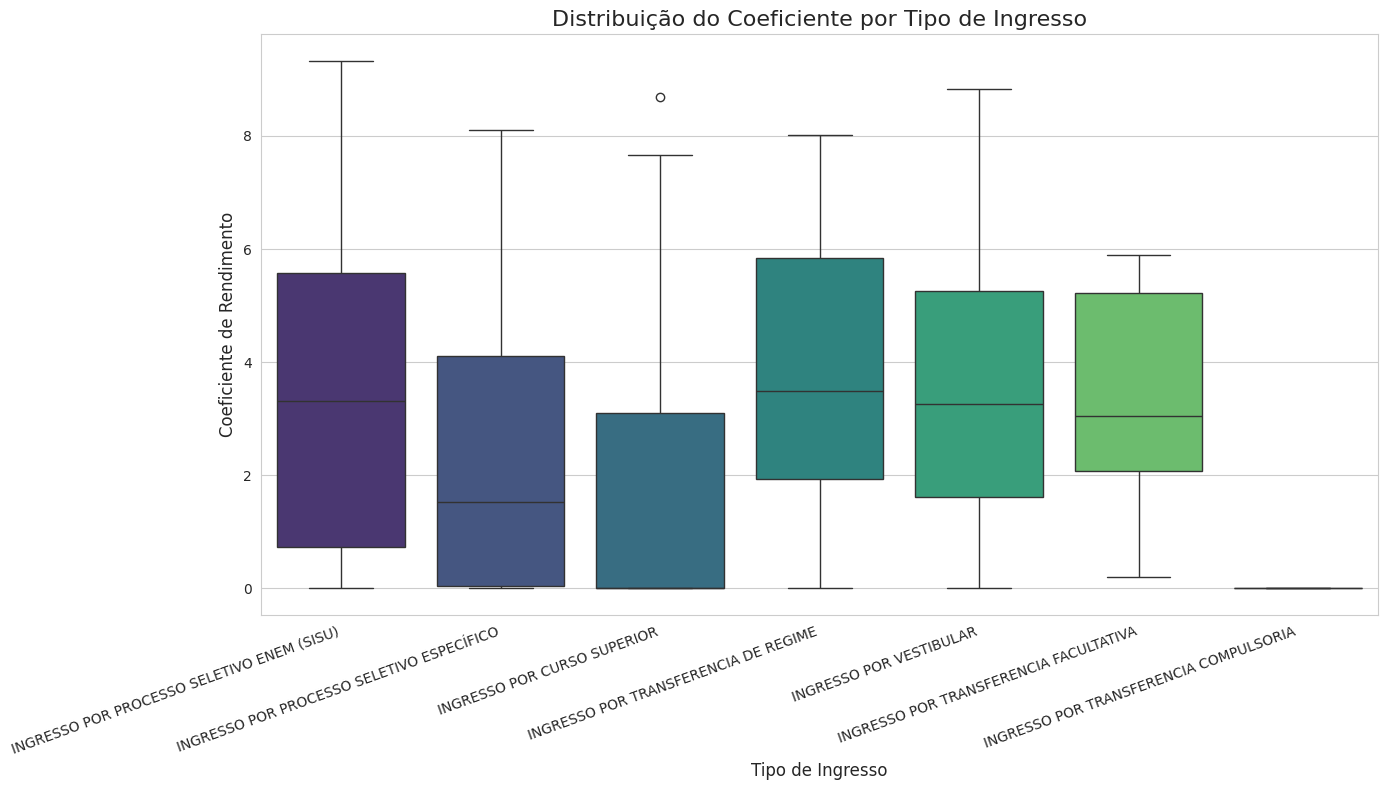

In [ ]:

# Executar o Teste de Kruskal-Wallis pois os dados não seguem uma distribuição normal
# Criar uma lista de amostras de 'Coeficiente' para cada 'Tipo de ingresso'
grupos = [df_alunos['Coeficiente'][df_alunos['Tipo ingresso'] == tipo] for tipo in df_alunos['Tipo ingresso'].unique()]

# Executar o teste
statistic, p_value = stats.kruskal(*grupos)

print("--- Teste de Kruskal-Wallis: Coeficiente por Tipo de Ingresso ---")
print(f"Estatística do teste: {statistic:.4f}")
print(f"P-valor: {p_value:.4f}")

if p_value < 0.05:
    print("Resultado: Há uma diferença estatisticamente significativa no Coeficiente entre os diferentes Tipos de Ingresso.")
else:
    print("Resultado: Não há evidência de uma diferença significativa no Coeficiente entre os diferentes Tipos de Ingresso.")

# Criar a Melhor Visualização (Box Plot)
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

sns.boxplot(data=df_alunos, x='Tipo ingresso', y='Coeficiente', palette='viridis')

plt.title('Distribuição do Coeficiente por Tipo de Ingresso', fontsize=16)
plt.xlabel('Tipo de Ingresso', fontsize=12)
plt.ylabel('Coeficiente de Rendimento', fontsize=12)
plt.xticks(rotation=20, ha='right')
plt.tight_layout()

<a id='associacao'></a>
### 5.2. Associação entre variáveis categóricas
- **Qui-quadrado de independência** → testar se **evasão está associada a sexo, raça, tipo de ingresso, estado civil.**

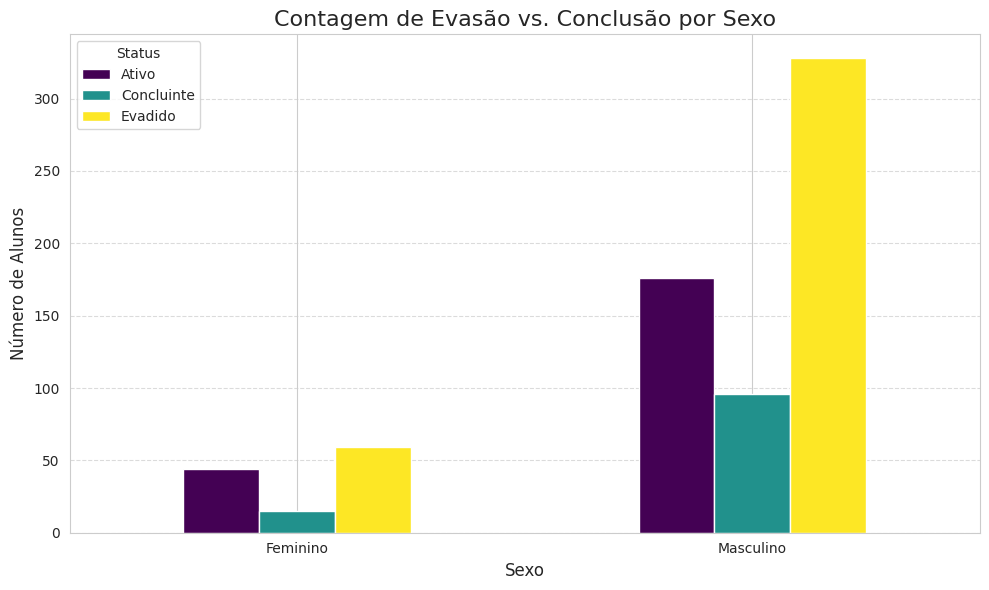

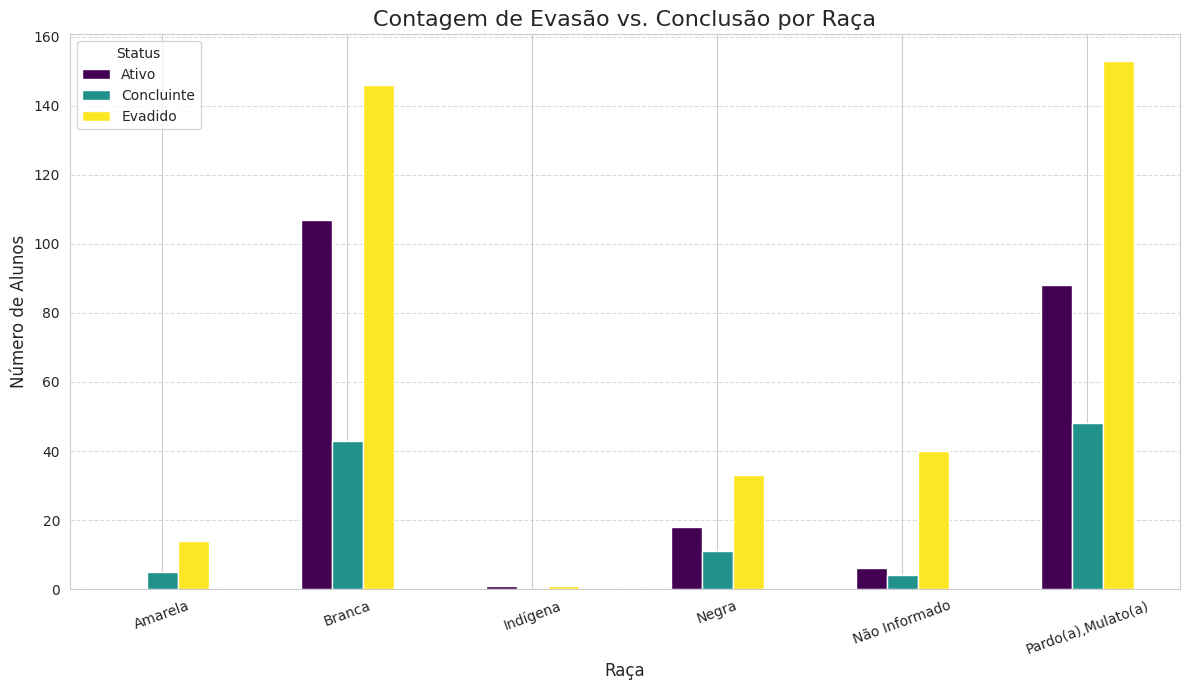

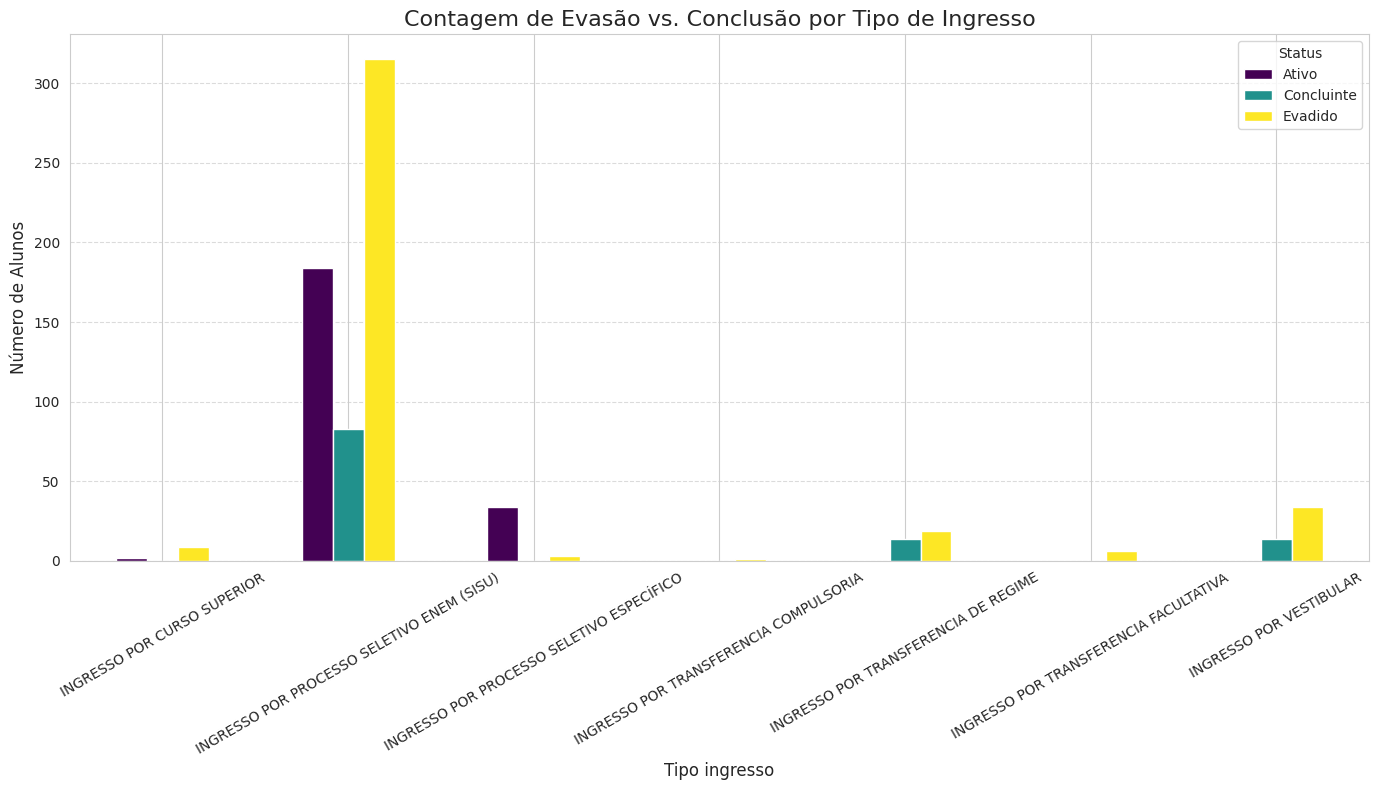

In [71]:
# Função para criar os gráficos agrupado

def plot_grouped_bar(column_name, title, figsize=(10, 6), rotation=0): # Essa função cria e salva gráficos de barras agrupadas, passa como parâmetros o nome da coluna, título do gráfico, tamanho da figura e rotação dos rótulos do eixo x
    """Cria um gráfico de barras agrupadas.""" 
    # Cria a tabela de contingência
    contingency_table = pd.crosstab(df_alunos[column_name], df_alunos['Status']) # Tabela cruzada entre a coluna especificada e a situação de evasão

    # Cria o gráfico
    contingency_table.plot(kind='bar', stacked=False, figsize=figsize, colormap='viridis')
    
    plt.title(title, fontsize=16)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Número de Alunos', fontsize=12)
    plt.xticks(rotation=rotation)
    plt.legend(title='Status')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

# Gerar os novos gráficos

# Gráfico para Sexo
plot_grouped_bar('Sexo', 'Contagem de Evasão vs. Conclusão por Sexo')

# Gráfico para Raça
plot_grouped_bar('Raça', 'Contagem de Evasão vs. Conclusão por Raça', figsize=(12, 7), rotation=20)

# Gráfico para Tipo de Ingresso
plot_grouped_bar('Tipo ingresso', 'Contagem de Evasão vs. Conclusão por Tipo de Ingresso', figsize=(14, 8), rotation=30)

<a id='corr'></a>
### 5.3. Correlação

- **Spearman** → se a relação não for linear ou variáveis ordinais.

In [ ]:
df_alunos.columns
df_historico.columns



Index(['Ano', 'Código', 'Nome da Disciplina', 'CH', 'CR', 'TU', 'MF', 'FA',
       'SF', 'SE', 'rga_anonimo', 'Disciplina', 'Grupo de Disciplinas',
       'Tipo de Disciplina', 'Optativa', 'Status', 'Coeficiente', 'Estrutura',
       'Disciplina_Limpia'],
      dtype='object')

In [77]:
dados_validos = df_historico[['Coeficiente', 'FA']].dropna()
spearman_corr, spearman_p = stats.spearmanr(dados_validos['Coeficiente'], dados_validos['FA'])
print(f"Correlação de Spearman: r={spearman_corr:.3f}, p={spearman_p:.10f}")

# Interpretação com base no valor de p
if spearman_p < 0.05:
    print("A correlação é estatisticamente significativa.")
else:
    print("A correlação não é estatisticamente significativa.")

Correlação de Spearman: r=-0.381, p=0.0000000000
A correlação é estatisticamente significativa.


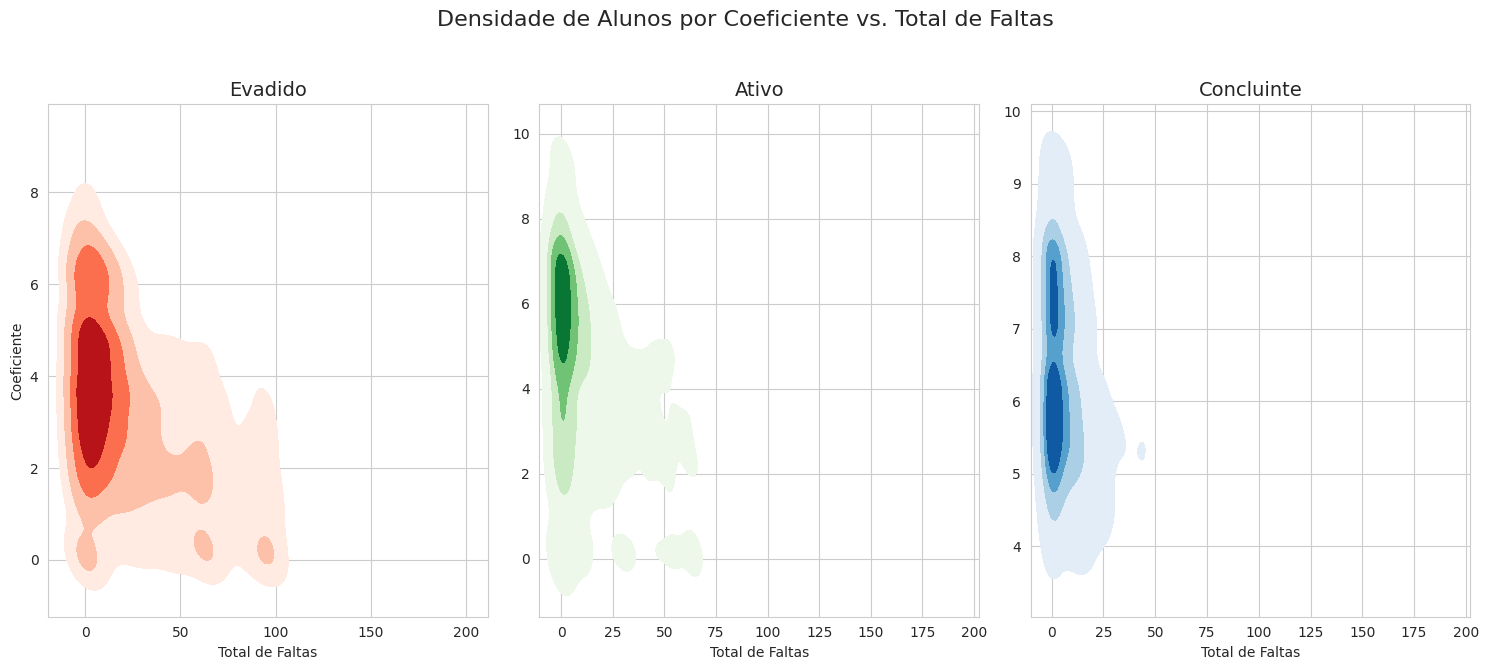

In [ ]:

plt.figure(figsize=(15, 7))

# Plot para 'Evadido'
plt.subplot(1, 3, 1) # 1 linha, 3 colunas, 1º gráfico
sns.kdeplot(data=df_historico[df_historico['Status'] == 'Evadido'],
            x='FA', y='Coeficiente', fill=True, cmap='Reds', levels=5)
plt.title('Evadido', fontsize=14)
plt.xlabel('Total de Faltas')
plt.ylabel('Coeficiente')

# Plot para 'Ativo'
plt.subplot(1, 3, 2) # 1 linha, 3 colunas, 2º gráfico
sns.kdeplot(data=df_historico[df_historico['Status'] == 'Ativo'],
            x='FA', y='Coeficiente', fill=True, cmap='Greens', levels=5)
plt.title('Ativo', fontsize=14)
plt.xlabel('Total de Faltas')
plt.ylabel('') # Não repete o rótulo Y

# Plot para 'Concluinte'
plt.subplot(1, 3, 3) # 1 linha, 3 colunas, 3º gráfico
sns.kdeplot(data=df_historico[df_historico['Status'] == 'Concluinte'],
            x='FA', y='Coeficiente', fill=True, cmap='Blues', levels=5)
plt.title('Concluinte', fontsize=14)
plt.xlabel('Total de Faltas')
plt.ylabel('') # Não repete o rótulo Y

plt.suptitle('Densidade de Alunos por Coeficiente vs. Total de Faltas', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta o layout para o título principal
plt.show()

Revelou que, a principal variável que separa os alunos que evadem dos que concluem não é o número de **faltas**, mas sim o **Coeficiente de Rendimento**. Alunos com CR baixo tendem a evadir, enquanto alunos com CR alto são os que efetivamente se formam.

<a id='comp'></a>
### 5.4. Comparação de distribuições

- Mann-Whitney U → comparar coeficientes entre dois grupos (ex.: evadidos vs concluintes) quando não há normalidade.

Estatística U: 2616.00
Valor-p: 1.7837e-45 (0.0000000000000000000000000000000000000000)
Há diferença significativa entre os coeficientes dos dois grupos.


/tmp/ipykernel_3970/3379827193.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Grupo", y="Coeficiente", data=df_plot, showmeans=True, palette='pastel')


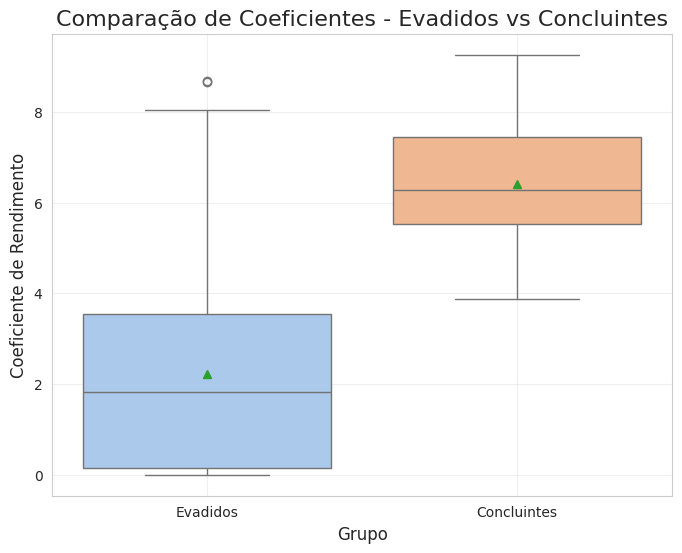

In [ ]:
evadidos = df_alunos[df_alunos['Status'] == 'Evadido']
concluintes = df_alunos[df_alunos['Status'] == 'Concluinte']

# Seleciona os coeficientes (o nome original da coluna é 'Coeficiente' com 'C' maiúsculo)
coef_evadidos = evadidos['Coeficiente'].dropna()
coef_concluintes = concluintes['Coeficiente'].dropna()

# Teste de Mann-Whitney U
stat, p = mannwhitneyu(coef_evadidos, coef_concluintes, alternative='two-sided')

print(f'Estatística U: {stat:.2f}')
print(f'Valor-p: {p:.4e} ({p:.40f})')
if p < 0.05:
    print('Há diferença significativa entre os coeficientes dos dois grupos.')
else:
    print('Não há diferença significativa entre os coeficientes dos dois grupos.')

# --- Prepara dataframe para o gráfico (usando 'Coeficiente' com 'C' maiúsculo) ---
df_plot = pd.DataFrame({
    "Coeficiente": list(coef_evadidos) + list(coef_concluintes),
    "Grupo": (["Evadidos"] * len(coef_evadidos)) + (["Concluintes"] * len(coef_concluintes))
})

# --- Boxplot com pontos individuais (usando 'Coeficiente' com 'C' maiúsculo) ---
plt.figure(figsize=(8,6))
sns.boxplot(x="Grupo", y="Coeficiente", data=df_plot, showmeans=True, palette='pastel')
plt.title("Comparação de Coeficientes - Evadidos vs Concluintes", fontsize=16)
plt.ylabel("Coeficiente de Rendimento", fontsize=12)
plt.xlabel("Grupo", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

**Conclusões**  
* O teste de Mann-Whitney U apresentou estatística U = 227.00 e valor-p praticamente igual a zero (≈ 1.31 × 10⁻²⁰).
* Segundo o resultado do teste, há diferenças significativas entre os coeficiente dos alunos evadidos e concluintes (p < 0,05), levando à rejeição da hipótese nula de equivalência entre as médias/medianas entre esses grupos.
* Como pode ser vizualizado no boxplot, os alunos evadidos possuem desempenho acadêmico significativamente menor, o que coincide com a hipótese de que coeficientes mais baixos estão associados à evasão. Já os alunos concluintes possuem um desempenho acadêmico superior.
* Por fim, os resultados reforçam a hipótese que a evasão está associada à um rendimento acadêmico inferior.

- Kolmogorov–Smirnov (K-S test) → comparar distribuição de notas de disciplinas entre evadidos e concluintes.

Estatística KS: 0.3760
Valor-p: 0.0000
As distribuições de notas entre evadidos e concluintes são significativamente diferentes.


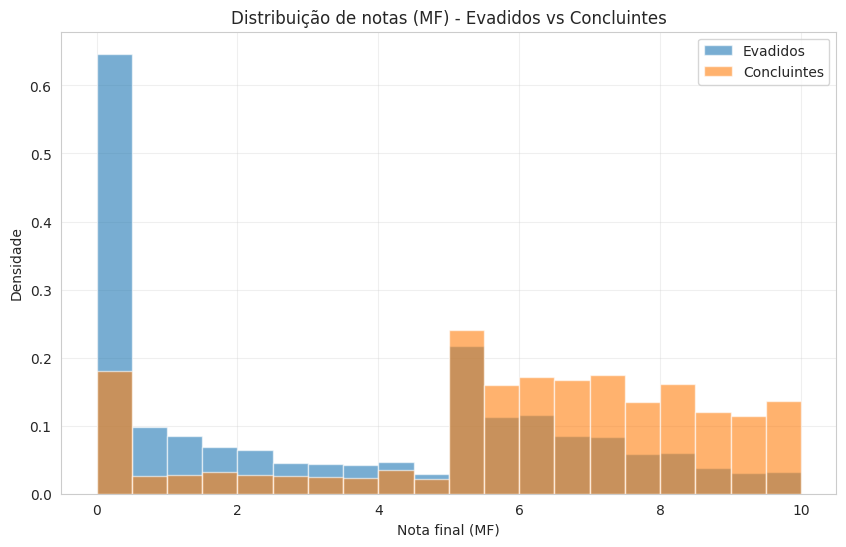

In [89]:
df_alunos = pd.concat([alunosAtivos, alunosInativos], ignore_index=True)

#Distribuição de notas (MF) entre evadidos e concluintes
evadidos_ids = evadidos["rga_anonimo"]
concluintes_ids = concluintes["rga_anonimo"]

# Filtrar notas (MF = média final) do histórico
notas_evadidos = histEscolar[histEscolar["rga_anonimo"].isin(evadidos_ids)]["MF"].dropna().astype(float)
notas_concluintes = histEscolar[histEscolar["rga_anonimo"].isin(concluintes_ids)]["MF"].dropna().astype(float)

# Executar KS-test
ks_result = ks_2samp(notas_evadidos, notas_concluintes)
ks_result
print(f'Estatística KS: {ks_result.statistic:.4f}')
print(f'Valor-p: {ks_result.pvalue:.4f}')
if ks_result.pvalue < 0.05:
    print('As distribuições de notas entre evadidos e concluintes são significativamente diferentes.')
else:
    print('As distribuições de notas entre evadidos e concluintes não são significativamente diferentes.')
# Plot comparativo das distribuições de notas
plt.figure(figsize=(10,6))

plt.hist(notas_evadidos, bins=20, alpha=0.6, density=True, label="Evadidos")
plt.hist(notas_concluintes, bins=20, alpha=0.6, density=True, label="Concluintes")

plt.title("Distribuição de notas (MF) - Evadidos vs Concluintes")
plt.xlabel("Nota final (MF)")
plt.ylabel("Densidade")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Conclusões**  
* Estatística KS: 0.0.3764, essa medida indica a distância máxima entre as duas distribuições acumuladas (evadidos vs concluintes). Um valor em torno de 0.37 mostra que as distribuições tem um desvio considerável.
* Valor-p: 0.0000, logo a hipótese nula de que as distribuições de notas (MF) de evadidos e concluintes são iguais é descartada.
* Dessa forma, conclui-se que as distribuições de notas entre evadidos e concluintes são significativamente diferentes.
* Como se pode ser vizualizado no gráfico, os alunos evadidos (Em azul) estão concentrados majoritariamente nas notas baixas, o que sugere que eles podem ter desistido por reprovações consecutivas ou sequer concluíram as disciplinas. Já os alunos concluintes, eles possuem distribuição mais espalhada, mas com grande densidade em notas acima de 5 (faixa de aprovação na UFMT).

<a id='model'></a>
### 5.5. Modelagem estatística
1 - A taxa de evasão é maior entre alunos reprovados mais de 2 vezes em disciplinas obrigatórias do 1º ano. → Teste Qui-quadrado + regressão logística.

/tmp/ipykernel_3970/2986452640.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  alunos_reprovacoes['mais_de_2_reprovacoes'] = alunos_reprovacoes['mais_de_2_reprovacoes'].fillna(False)


=== Teste Qui-quadrado ===
Estatística Qui-quadrado: 4.1213
Valor-p: 0.0423
Há associação significativa entre reprovações e evasão.

=== Regressão Logística ===
Optimization terminated successfully.
         Current function value: 0.687015
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 evasao   No. Observations:                  718
Model:                          Logit   Df Residuals:                      716
Method:                           MLE   Df Model:                            1
Date:                Wed, 03 Sep 2025   Pseudo R-squ.:                0.004474
Time:                        21:41:32   Log-Likelihood:                -493.28
converged:                       True   LL-Null:                       -495.49
Covariance Type:            nonrobust   LLR p-value:                   0.03523
                            coef    std err          z      P>|z|      [0.025      0.975]
---------------

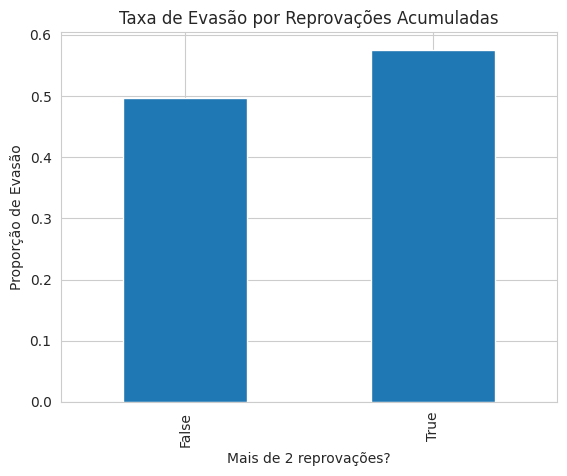

In [90]:
# --- Preparação dos dados ---
# Junta todos os alunos e cria a variável dependente "evasao"
df_alunos['evasao'] = df_alunos['rga_anonimo'].isin(evadidos['rga_anonimo']).astype(int)

# Filtrar disciplinas obrigatórias do 1º ano (semestres 1 e 2)
historico_1ano = histEscolar[histEscolar['SE'].isin([1, 2])]
obrigatorias_1ano = historico_1ano[historico_1ano['Optativa'] == 'Não']

# Selecionar reprovações
reprovacoes = obrigatorias_1ano[obrigatorias_1ano['SF'].isin(('RM', 'RMF', 'RF', 'RP'))]

# Contar reprovações por aluno
reprovacoes_count = (
    reprovacoes.groupby('rga_anonimo')
    .size()
    .reset_index(name='num_reprovacoes')
)
reprovacoes_count['mais_de_2_reprovacoes'] = reprovacoes_count['num_reprovacoes'] > 2

# Merge com alunos
alunos_reprovacoes = df_alunos.merge(
    reprovacoes_count[['rga_anonimo', 'mais_de_2_reprovacoes']],
    on='rga_anonimo',
    how='left'
)
alunos_reprovacoes['mais_de_2_reprovacoes'] = alunos_reprovacoes['mais_de_2_reprovacoes'].fillna(False)

# --- Teste Qui-quadrado ---
contingencia = pd.crosstab(
    alunos_reprovacoes['mais_de_2_reprovacoes'],
    alunos_reprovacoes['evasao']
)

chi2, p, dof, expected = stats.chi2_contingency(contingencia)

print("=== Teste Qui-quadrado ===")
print(f"Estatística Qui-quadrado: {chi2:.4f}")
print(f"Valor-p: {p:.4f}")
print("Há associação significativa entre reprovações e evasão." if p < 0.05 
      else "Não há associação significativa entre reprovações e evasão.")

# --- Regressão Logística ---
print("\n=== Regressão Logística ===")
y = alunos_reprovacoes['evasao']
X = alunos_reprovacoes[['mais_de_2_reprovacoes']].astype(int)
X = sm.add_constant(X)  # adiciona intercepto

modelo = sm.Logit(y, X).fit()
print(modelo.summary())

# --- Odds Ratios ---
odds_ratios = np.exp(modelo.params)
print("\n=== Odds Ratios ===")
print(odds_ratios)

taxa_evasao = (
    alunos_reprovacoes.groupby('mais_de_2_reprovacoes')['evasao']
    .mean()
)
taxa_evasao.plot(kind='bar', ylabel='Proporção de Evasão', xlabel='Mais de 2 reprovações?')
plt.title('Taxa de Evasão por Reprovações Acumuladas')
plt.show()


**Conclusões**
* Os resultados obtidos indicam que não há evidências estatisticamente significativas de que a evasão esteja associada ao fato de o aluno ter mais de duas reprovações em disciplinas obrigatórias do primeiro ano. O gráfico de barras mostra que a proporção de evasão entre os estudantes com mais de duas reprovações é praticamente igual à daqueles com até duas reprovações, sugerindo que o efeito não é expressivo.
* O Teste Qui-quadrado:
    Estatística: 0.0000
    Valor-p = 1.0000
    Como p > 0.05, não há associação estatisticamente significativa entre número de reprovações e evasão. Ou seja, considerando apenas a variável categórica mais_de_2_reprovações”, não é possível rejeitar a hipótese nula de independência.
* Regressão Logística
    Coeficiente de mais_de_2_reprovacoes = 0.0224, com p = 0.939.
    Odds ratio ≈ 1.02, indicando que quem tem mais de 2 reprovações teria 2% mais chance de evadir (Valor bastante baixo)
    O pseudo R² = 0.000016 → o modelo praticamente não explica a variabilidade da evasão apenas com essa variável.
* Por fim, não há evidências estatisticamente significativas de que ter mais de 2 reprovações no 1º ano aumente (ou diminua) a probabilidade de evasão.

2 - **O número de faltas tem correlação negativa significativa com o coeficiente.** → Correlação de Pearson/Spearman

In [92]:
#→ Correlação de Pearson/Spearman
# Agrupa faltas por aluno no histórico
faltas = (
    histEscolar.groupby('rga_anonimo')['FA']
    .sum()
    .reset_index(name='total_faltas')
)
# Merge com alunos
alunos_faltas = df_alunos.merge(
    faltas, on='rga_anonimo', how='left'
)
alunos_faltas['total_faltas'] = alunos_faltas['total_faltas'].fillna(0)
# Correlação de Spearman
corr, p_value = stats.spearmanr(alunos_faltas['total_faltas'], alunos_faltas['Coeficiente'].fillna(0))
print(f'Correlação de Spearman: {corr:.4f}, Valor-p: {p_value:.4f}')
if p_value < 0.05:
    print('Correlação significativa entre faltas e coeficiente.')
else:
    print('Não há correlação significativa entre faltas e coeficiente.')


Correlação de Spearman: -0.0223, Valor-p: 0.5516
Não há correlação significativa entre faltas e coeficiente.


**Conclusões**
* Não há correlação significativa entre o número de faltas e o coeficiente, o valor da correlação de Spearman está muito próximo de zero, o que indica que não existe uma relação consistente entre o número de faltas e o coeficiente.
* O Valor-p é 0.5516, então a hipótese nula não é rejeitada. Logo, não há evidência estatística de que faltas estejam associadas ao coeficiente.

3 - O coeficiente de rendimento médio é diferente entre tipos de ingresso.

In [94]:
# Agrupar coeficientes por tipo de ingresso
grupos = [grupo['Coeficiente'].dropna().values for _, grupo in df_alunos.groupby('Tipo ingresso', observed=False)]

# Teste de Kruskal-Wallis
stat, p_valor = stats.kruskal(*grupos)
print(f'Kruskal-Wallis H-statistic: {stat:.4f}, Valor-p: {p_valor:.4f}')

if p_valor < 0.05:
    print('Há diferença significativa no coeficiente entre tipos de ingresso.')
else:
    print('Não há diferença significativa no coeficiente entre tipos de ingresso.')

Kruskal-Wallis H-statistic: 11.2680, Valor-p: 0.0804
Não há diferença significativa no coeficiente entre tipos de ingresso.


**Conclusões**
* Estatítica H = 11.2680, p = 0.0804
    O valor-p é maior que 0.05, portanto a hipótese nula não é descartada. Isso significa que não há evidência estatística de diferença significativa nos coeficientes entre os diferentes tipos de ingresso.